# Inhaltsverzeichnis

- [0. Bibliotheken und Funktionen](#0)
- [1. Datenvorbereitung](#10)
  - [1a.](#11)
  - [1b.](#12)
  - [1c.](#13)
  - [1d.](#14)
- [2. Explorative Datenanalyse](#20)
  - [2a.](#21)
  - [2b.](#22)
  - [2c.](#23)
  - [2d.](#24)
  - [2e.](#25)
  - [2f.](#26)
- [3. Weiterführende Analyse der Stromerzeugung](#30)
  - [3a.](#31)
  - [3b.](#32)
  - [3c.](#33)
  - [3d.](#34)
  - [3e.](#35)
- [4. Erzeugter Solarstrom in Abhängigkeit vom Wetter](#40)
  - [4a.](#41)
  - [4b.](#42)
  - [4c.](#43)
  - [4d.](#44)
  - [4e.](#45)
  - [4f.](#46)
  - [4g.](#47)
- [5. Photovoltaik-Ausbau in Deutschland](#50)
  - [5a.](#51)
  - [5b.](#52)
  - [5c.](#53)
  - [5d.](#54)
  - [5e.](#55)
  - [5f.](#56)
  - [5g.](#57)
  - [5h.](#58)
  - [5i.](#591)
  - [5j.](#592)
- [6. Modellbildung](#60)
  - [6a.](#61)
  - [6b.](#62)
  - [6c.](#63)
- [7. Zusammenfassung](#70)


<a id = 0></a>
# Bibliotheken und Funktionen 

#### Alle notwendigen Bibliotheken herunterladen

In [1]:
import sys
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install openmeteo_requests
!{sys.executable} -m pip install requests_cache
!{sys.executable} -m pip install retry_requests
!{sys.executable} -m pip install folium
!{sys.executable} -m pip install wordcloud
!{sys.executable} -m pip install scikit-learn

You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cveta\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


#### Die bibliotheken importieren

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import os
import openmeteo_requests
import requests_cache
from retry_requests import retry
import calendar
import folium
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

#### Funktionen, die während des Projekts verwendet werden

In [3]:
def concatenate_csv_files(folder, file_names_prefix, start_index, end_index):
    file_names = [f"{file_names_prefix}_{i}.csv" for i in range(start_index, end_index + 1)]
    file_paths = [os.path.join(folder, file_name) for file_name in file_names]
    concatenated_df = pd.concat([pd.read_csv(fp) for fp in file_paths], ignore_index=True)
    return concatenated_df

<a id = 10></a>
# Aufgabe 1: Datenvorbereitung

<a id = 11></a>
#### a) Lesen Sie die CSV-Dateien zur Nettostromerzeugung in den einzelnen Kalendarjehren ein und führen Sie sie in einem DataFrame namens df_el zusammen.

In [4]:
df_el = concatenate_csv_files(r"Daten\Nettostromerzeugung", r"Nettostromerzeugung_in_Deutschland", 2018, 2023)
df_el

Tag  Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  \
0     01.01.2018             156.8            46.70         126.60   
1     02.01.2018             220.9            47.10         128.30   
2     03.01.2018             196.0            48.80         127.70   
3     04.01.2018             216.8            51.80         128.40   
4     05.01.2018             209.6            52.00         128.70   
...          ...               ...              ...            ...   
2186  27.12.2023               0.0            58.08         120.08   
2187  28.12.2023               0.0            56.76         121.76   
2188  29.12.2023               0.0            54.64         122.82   
2189  30.12.2023               0.0            53.26         123.31   
2190  31.12.2023               0.0            53.86         124.90   

      Braunkohle(GWh)  Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  \
0              204.50            8.9            43.60     2.30        66.30   
1              355.10           10.4           107.60     2.40       117.90   
2              248.00            8.3            65.30     2.30        92.10   
3              319.90            9.1           176.60     2.30       113.20   
4              338.50            9.0           192.90     2.30       123.40   
...               ...            ...              ...      ...          ...   
2186           109.89            NaN            43.47     9.61       125.11   
2187            77.25            NaN            59.71    10.48        77.81   
2188            74.39            NaN            60.77     9.31        71.84   
2189            78.90            NaN            53.99     9.37        79.68   
2190            78.01            NaN            48.26     9.43        70.11   

      Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
0                0.40                 1.10         1.20   
1                0.40                 1.20         1.60   
2                0.40                 1.50         1.40   
3                0.40                 1.70         1.50   
4                0.40                 1.50         1.40   
...               ...                  ...          ...   
2186             0.49                 2.76         6.78   
2187             0.49                 1.54         4.90   
2188             0.49                 2.32         4.90   
2189             0.49                 2.52         5.78   
2190             0.49                 3.02         5.07   

      Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
0                      13.10                         15.10   
1                      13.30                         15.20   
2                      14.30                         16.40   
3                      13.90                         15.90   
4                      12.80                         14.70   
...                      ...                           ...   
2186                   13.40                         15.12   
2187                   13.28                         14.99   
2188                   12.84                         14.49   
2189                   12.78                         14.42   
2190                   12.76                         14.40   

      Wind Offshore(GWh)  Wind Onshore(GWh)  Solar(GWh)  
0                  76.40             609.60       31.10  
1                  63.90             393.20       17.20  
2                  92.30             820.20       13.80  
3                  37.60             551.90        9.80  
4                  28.00             512.30       19.40  
...                  ...                ...         ...  
2186               97.21             391.67       51.65  
2187              125.05             866.36       32.45  
2188              130.80             910.13       30.52  
2189              135.20             613.28       47.41  
2190              136.91             614.10       26.35  

[2191 rows x 17 columns]

<a id = 12></a>
#### b) Passen Sie die dtypes der Spalten von df_el geeignet an.

In [5]:
df_el['Tag'] = pd.to_datetime(df_el['Tag'], format='%d.%m.%Y')
df_el.dtypes

Tag                             datetime64[ns]
Kernenergie(GWh)                       float64
Laufwasser(GWh)                        float64
Biomasse(GWh)                          float64
Braunkohle(GWh)                        float64
Kohlegas(GWh)                          float64
Steinkohle(GWh)                        float64
Öl(GWh)                                float64
Erdgas(GWh)                            float64
Geothermie(GWh)                        float64
Speicherwasser(GWh)                    float64
Andere(GWh)                            float64
Erneuerbarer Müll(GWh)                 float64
Nicht-erneuerbarer Müll(GWh)           float64
Wind Offshore(GWh)                     float64
Wind Onshore(GWh)                      float64
Solar(GWh)                             float64
dtype: object

<a id = 13></a>
#### c) Überprüfen Sie den Datensatz auf fählende Werte und wenden Sie ggf. eine geeignete Strategie an, um mit diesen zu verfahren.

In [6]:
missing_values =df_el.isnull().sum()
missing_values

Tag                                0
Kernenergie(GWh)                   0
Laufwasser(GWh)                    0
Biomasse(GWh)                      0
Braunkohle(GWh)                    0
Kohlegas(GWh)                   1461
Steinkohle(GWh)                    0
Öl(GWh)                            0
Erdgas(GWh)                        0
Geothermie(GWh)                    0
Speicherwasser(GWh)                0
Andere(GWh)                        0
Erneuerbarer Müll(GWh)             0
Nicht-erneuerbarer Müll(GWh)       0
Wind Offshore(GWh)                 0
Wind Onshore(GWh)                  0
Solar(GWh)                         0
dtype: int64

#### _Wir haben fehlende Daten nur in der Spalte Kohlegas(GWh). Unsere Strategie besteht darin, die fehlende Daten mit den Spaltenmittelwert aufzufüllen._

In [7]:
df_el['Kohlegas(GWh)'].fillna(df_el['Kohlegas(GWh)'].mean(), inplace=True)
missing_values = df_el.isnull().sum()
missing_values

Tag                             0
Kernenergie(GWh)                0
Laufwasser(GWh)                 0
Biomasse(GWh)                   0
Braunkohle(GWh)                 0
Kohlegas(GWh)                   0
Steinkohle(GWh)                 0
Öl(GWh)                         0
Erdgas(GWh)                     0
Geothermie(GWh)                 0
Speicherwasser(GWh)             0
Andere(GWh)                     0
Erneuerbarer Müll(GWh)          0
Nicht-erneuerbarer Müll(GWh)    0
Wind Offshore(GWh)              0
Wind Onshore(GWh)               0
Solar(GWh)                      0
dtype: int64

<a id = 14></a>
#### d) Beurteilen Sie die Datenqualität des Datensatzes.

In [8]:
df_el.iloc[:, 1:].describe()

Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  Braunkohle(GWh)  \
count       2191.000000      2191.000000    2191.000000      2191.000000   
mean         140.900374        48.892912     120.275427       273.098517   
std           69.443890         9.902001       6.526644       108.460889   
min            0.000000        27.400000     102.700000         0.000000   
25%           94.900000        40.900000     115.800000       204.385000   
50%          160.400000        48.000000     121.200000       282.900000   
75%          190.100000        56.300000     125.600000       339.425000   
max          227.900000        72.100000     132.400000       643.000000   

       Kohlegas(GWh)  Steinkohle(GWh)      Öl(GWh)  Erdgas(GWh)  \
count    2191.000000      2191.000000  2191.000000  2191.000000   
mean        7.588630       134.881187     3.206951   133.153318   
std         2.418919        85.395325     2.656965    63.901638   
min         0.000000        19.090000     0.200000    23.700000   
25%         7.588630        62.700000     1.600000    83.900000   
50%         7.588630       115.600000     2.200000   121.300000   
75%         7.588630       194.700000     3.100000   170.000000   
max        14.400000       401.600000    14.740000   337.200000   

       Geothermie(GWh)  Speicherwasser(GWh)  Andere(GWh)  \
count       2191.00000          2191.000000  2191.000000   
mean           0.43592             3.066919     1.895737   
std            0.11291             1.547779     1.575403   
min            0.10000             0.390000     0.000000   
25%            0.40000             1.800000     0.900000   
50%            0.40000             2.700000     1.600000   
75%            0.50000             4.100000     2.000000   
max            0.74000             8.600000     7.870000   

       Erneuerbarer Müll(GWh)  Nicht-erneuerbarer Müll(GWh)  \
count             2191.000000                   2191.000000   
mean                12.626805                     14.473555   
std                  2.559100                      2.965119   
min                  1.600000                      1.900000   
25%                 11.400000                     13.000000   
50%                 12.900000                     14.700000   
75%                 14.200000                     16.300000   
max                 19.600000                     22.400000   

       Wind Offshore(GWh)  Wind Onshore(GWh)   Solar(GWh)  
count         2191.000000        2191.000000  2191.000000  
mean            65.150858         270.069215   135.082711  
std             38.788515         200.117620    88.293548  
min              0.400000          13.740000     5.340000  
25%             31.400000         118.150000    49.550000  
50%             63.100000         211.060000   131.400000  
75%             97.320000         372.775000   209.250000  
max            156.730000        1008.340000   353.990000

<a id = 20></a>
# Aufgabe 2: Explorative Datenanalyse

<a id = 21></a>
#### a) An welchen zehn Tagen wurde insgesamt am meisten Strom erzeugt?

In [9]:
df_el['Gesamtstromerzeugung'] = df_el.iloc[:, 1:17].sum(axis=1)
top_10_days_by_total_electricity_production = df_el.nlargest(10, 'Gesamtstromerzeugung')
top_10_days_by_total_electricity_production[['Tag', 'Gesamtstromerzeugung']]

Tag  Gesamtstromerzeugung
59  2018-03-01                1936.3
58  2018-02-28                1934.6
379 2019-01-15                1887.6
53  2018-02-23                1878.6
381 2019-01-17                1876.7
60  2018-03-02                1870.0
56  2018-02-26                1869.7
372 2019-01-08                1860.3
57  2018-02-27                1854.4
394 2019-01-30                1846.7

<a id = 22></a>
#### b) An welchem Tag wurde bisher am meisten Windstrom erzeugt?

In [10]:
df_el['Gesamte Windstromerzeugung'] = df_el['Wind Onshore(GWh)'] + df_el['Wind Offshore(GWh)']
day_max_windenergy_production = df_el.loc[df_el['Gesamte Windstromerzeugung'].idxmax()]

print("Tag mit der meisten Windstrom: %s\nWindstrom produziert: %s GWh" % (day_max_windenergy_production['Tag'].date(), day_max_windenergy_production['Gesamte Windstromerzeugung'].round(2)))

Tag mit der meisten Windstrom: 2023-12-21
Windstrom produziert: 1112.85 GWh


<a id = 23></a>
#### c) Ermitteln Sie, wie viel Strom mit jedem der Energietrager im Betrachtungszeitraum 2018-2023 pro Jahr (absolut) erzeugt wurde. Visualisieren Sie diese Ergebnisse in einem geeigneten Diagramm.

In [11]:
df_el['Jahr'] = df_el['Tag'].dt.year
cols = df_el.columns.tolist()
cols.remove('Jahr')
numeric_columns = df_el.select_dtypes(include=[np.number]).columns
yearly_energy_production = df_el.groupby('Jahr')[numeric_columns].sum()
yearly_energy_production.iloc[:, :-2]

Kernenergie(GWh)  Laufwasser(GWh)  Biomasse(GWh)  Braunkohle(GWh)  \
Jahr                                                                      
2018          71865.70         17024.20       44306.40        131498.90   
2019          70992.50         18645.80       44089.00        101923.70   
2020          60913.20         17333.30       44848.60         82127.60   
2021          65444.40         18305.20       44416.70         99370.10   
2022          32773.30         16334.30       43611.00        105943.40   
2023           6723.62         19481.57       42251.76         77495.15   

      Kohlegas(GWh)  Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  Geothermie(GWh)  \
Jahr                                                                          
2018     3585.00000         72405.90   751.90     40948.50            125.0   
2019     1954.70000         49501.80   718.50     50945.30            144.4   
2020     2777.43863         35460.50   651.60     57096.50            174.2   
2021     2769.85000         46662.40   767.70     51795.80            173.8   
2022     2769.85000         55442.70   988.60     45163.50            152.6   
2023     2769.85000         36051.38  3148.13     45789.32            185.1   

      Speicherwasser(GWh)  Andere(GWh)  Erneuerbarer Müll(GWh)  \
Jahr                                                             
2018               901.80       241.80                 4931.70   
2019              1310.90       207.60                 4627.00   
2020              1212.30       719.00                 4637.80   
2021              1178.40       606.70                 4575.40   
2022              1124.30       589.20                 4372.60   
2023               991.92      1789.26                 4520.83   

      Nicht-erneuerbarer Müll(GWh)  Wind Offshore(GWh)  Wind Onshore(GWh)  \
Jahr                                                                        
2018                       5655.90            19178.70           88710.60   
2019                       5399.20            24379.00           99166.30   
2020                       5377.10            26902.80          102741.30   
2021                       5261.40            24015.20           88033.80   
2022                       4915.50            24752.20           97737.50   
2023                       5102.46            23517.63          115332.15   

      Solar(GWh)  Gesamtstromerzeugung  
Jahr                                    
2018    43494.50          545626.50000  
2019    44384.90          518390.60000  
2020    48577.20          491550.43863  
2021    48428.40          501805.25000  
2022    57607.90          494278.45000  
2023    53473.32          438623.45000

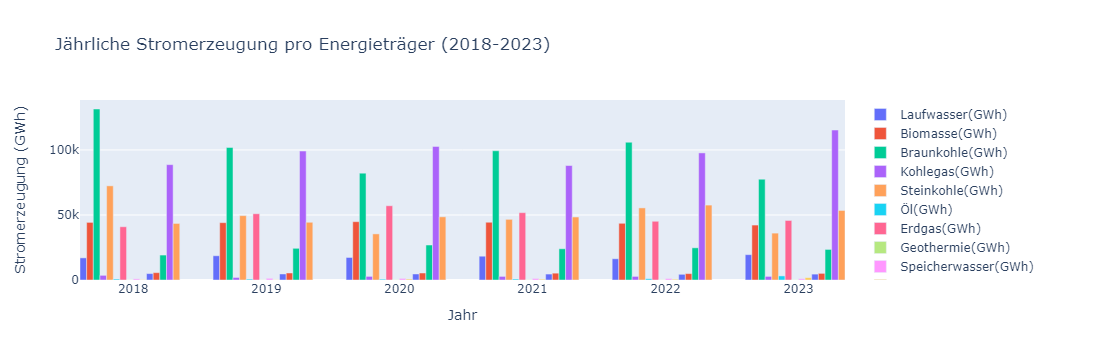

In [12]:
# Berechnen der Positionen der Balken für jedes Jahr und jeden Energieträger
years = df_el['Jahr'].unique()
energieträger = df_el.columns[2:-3]  

# Breite der Balken
bar_width = 0.1

# Erstellen einer Figur
fig = go.Figure()

# Zusätzliche Verschiebung für den leeren Raum zwischen den Gruppen
space_width = 1
total_bar_width = bar_width * len(energieträger)

# Erstellen der Balken für jeden Energieträger in jedem Jahr
for i, eträger in enumerate(energieträger):
    fig.add_trace(go.Bar(
        x=[year + i * bar_width + year * space_width for year in range(len(years))],
        y=df_el.groupby('Jahr')[eträger].sum(),
        name=eträger,
        width=bar_width
    ))

# Einstellen der x-Achsen-Ticks und Labels
fig.update_layout(
    barmode='group',
    xaxis=dict(
        tickvals=[j + total_bar_width/2 + j * space_width for j in range(len(years))],
        ticktext=years
    ),
    yaxis_title='Stromerzeugung (GWh)',
    xaxis_title='Jahr',
    title='Jährliche Stromerzeugung pro Energieträger (2018-2023)'
)

fig.show()


<a id = 24></a>
#### d) An wie vielen Tagen wurde mehr als 30% des Stroms durch Sonnenenergie erzeugt?

In [13]:
df_el['Solaranteil'] = (df_el['Solar(GWh)'] / df_el['Gesamtstromerzeugung'])*100
result = (df_el['Solaranteil'] > 30).sum()
print("Anzahl der Tage mit Solaranteil > 30%%: %d" % result)

Anzahl der Tage mit Solaranteil > 30%: 29


<a id = 25></a>
#### e) Visualisieren und untersuchen Sie anhand von Histogrammen die Verteilung des taglich erzeugten Windstroms. Erstellen Sie je ein Histogramm fur Onshore und Offshore und vergleichen Sie die beobachteten Verteilungen.

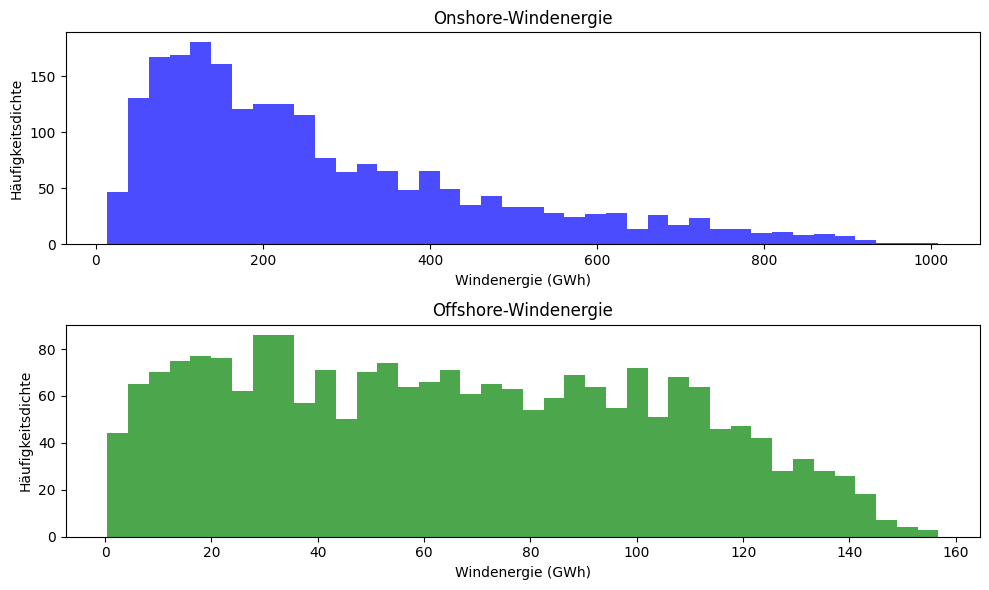

In [14]:
plt.figure(figsize=(10, 6))


#Onshore wind energy diagram
plt.subplot(2, 1, 1)
plt.hist(df_el['Wind Onshore(GWh)'], bins=40, color='blue', alpha=0.7)
plt.title('Onshore-Windenergie')
plt.xlabel('Windenergie (GWh)')
plt.ylabel('Häufigkeitsdichte')

#Offshore wind energy diagram
plt.subplot(2, 1, 2)
plt.hist(df_el['Wind Offshore(GWh)'], bins=40, color='green', alpha=0.7)
plt.title('Offshore-Windenergie')
plt.xlabel('Windenergie (GWh)')
plt.ylabel('Häufigkeitsdichte')

plt.tight_layout()
plt.show()

#### _Wir können feststellen, dass bei der Onshore-Windenergie ein größerer Unterschied zwischen Windkraftanlagen besteht, die weniger Energie erzeugen und viele sind, und solchen, die mehr Energie erzeugen und wenige sind. Bei der Offshore-Windenergie ist die Verteilung gleichmäßiger, aber die insgesamt erzeugte Energie ist geringer._

<a id = 26></a>
#### f) Berechnen Sie mit Hilfe von describe verschiedene statistische Kenngroßen für den täglich erzeugten Solarstrom bezogen auf die einzelnen Jahre des Betrachtungszeitraums. Visualisieren Sie mit Hilfe von Box-Whisker-Plots die Verteilungen der Werte für den täglich generierten Solarstrom. Erstellen Sie für jedes Jahr ein separates Diagramm. Beschreiben Sie die Entwicklungen vor dem Hintergrund der historischen jährlichen Sonnenscheindauer in Deutschland und dem PV-Ausbau (vgl. Aufgabe 5). 

In [15]:
solar_stats = df_el.groupby('Jahr')['Solar(GWh)'].describe()
solar_stats

count        mean        std   min     25%     50%      75%     max
Jahr                                                                     
2018  365.0  119.163014  75.444009  6.90  44.200  119.70  181.600  271.80
2019  365.0  121.602466  77.134277  5.70  49.300  116.10  185.300  280.10
2020  366.0  132.724590  84.286585  9.00  50.625  126.90  208.675  307.90
2021  365.0  132.680548  86.665768  5.60  46.200  132.00  200.400  333.20
2022  365.0  157.829863  98.948537  6.80  61.600  160.30  239.700  346.50
2023  365.0  146.502247  98.684604  5.34  49.080  137.96  232.440  353.99

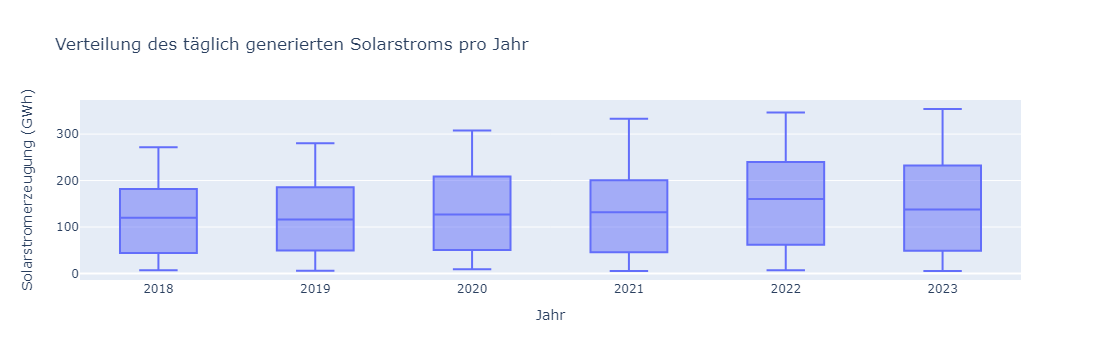

In [16]:
#Whisker Plots 
fig = px.box(df_el, x='Jahr', y='Solar(GWh)', title='Verteilung des täglich generierten Solarstroms pro Jahr')
fig.update_layout(xaxis_title='Jahr', yaxis_title='Solarstromerzeugung (GWh)')
fig.show()

#### _Die durchschnittlich pro Tag produzierte Solarenergie steigt logischerweise jährlich an. Dies entspricht der Zunahme der Sonneneinstrahlung und der Anzahl der Solaranlagen in Deutschland._

<a id = 30></a>
# Aufgabe 3: Weiterführende Analyse der Stromerzeugung

<a id = 31></a>
#### a) Visualisieren Sie in einem Säulendiagramm, wie viel Strom pro Monat im Betrachtungszeitraum insgesamt erzeugt wurde. Beschreiben Sie den Verlauf.

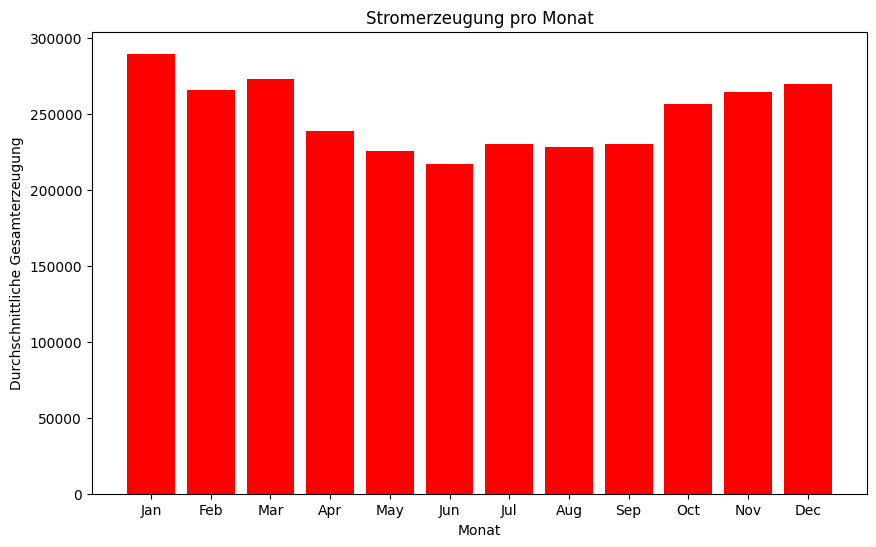

In [17]:
df_el['Monat'] = df_el['Tag'].dt.month
monthly_production = df_el.groupby('Monat')['Gesamtstromerzeugung'].sum()


#Total produced energy per month - diagram creation
plt.figure(figsize=(10, 6))
plt.bar(monthly_production.index, monthly_production.values, color='red')
plt.title('Stromerzeugung pro Monat')
plt.xlabel('Monat')
plt.ylabel('Durchschnittliche Gesamterzeugung')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

#### _In den Wintermonaten wird mehr Strom erzeugt, in den Sommermonaten weniger. Es ist zu erkennen, dass das Maximum der erzeugten Energie im Januar und das Minimum im Juli liegt._

<a id = 32></a>
#### b) Berechnen und visualisieren Sie die mittlere erzeugte Energie pro Wochentag und beschreiben Sie mögliche Trends.

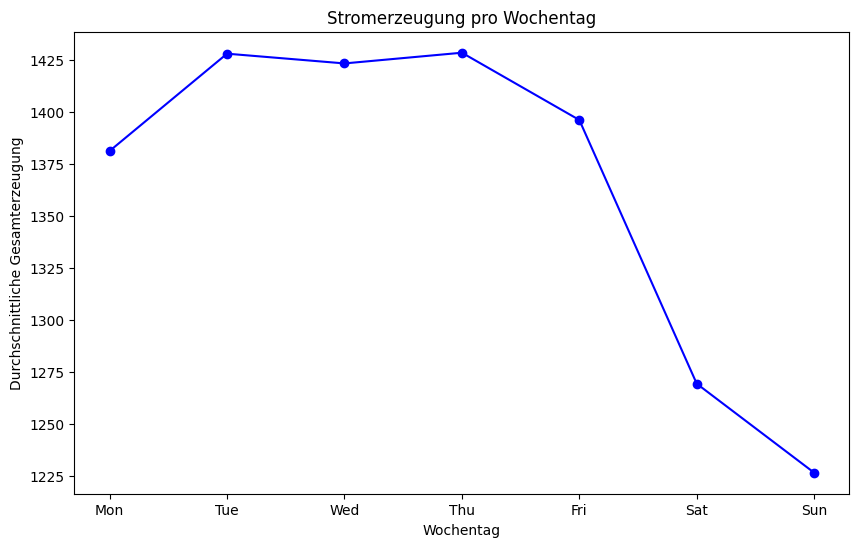

In [18]:
df_el['Wochentag'] = df_el['Tag'].dt.weekday
weekday_production = df_el.groupby('Wochentag')['Gesamtstromerzeugung'].mean()

#Total produced energy per day of the week
plt.figure(figsize=(10, 6))
plt.plot(weekday_production.index, weekday_production.values, marker='o', linestyle='-', color='blue')
plt.title('Stromerzeugung pro Wochentag')
plt.xlabel('Wochentag')
plt.ylabel('Durchschnittliche Gesamterzeugung')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

#### _Es fällt auf, dass die an den Werktagen produzierte Energie deutlich höher ist als die am Wochenende produzierte. Es ist logisch, dass an Arbeitstagen mehr Energie produziert wird, da meisten Unternehmen an diesen Tagen Energie benötigen._

<a id = 33></a>
#### c) Visualisieren Sie die Zusammensetzung des Strommixes im Zeitverlauf. Differenzieren Sie dabei nur nach erneuerbaren und nicht erneuerbaren Energieträgern.

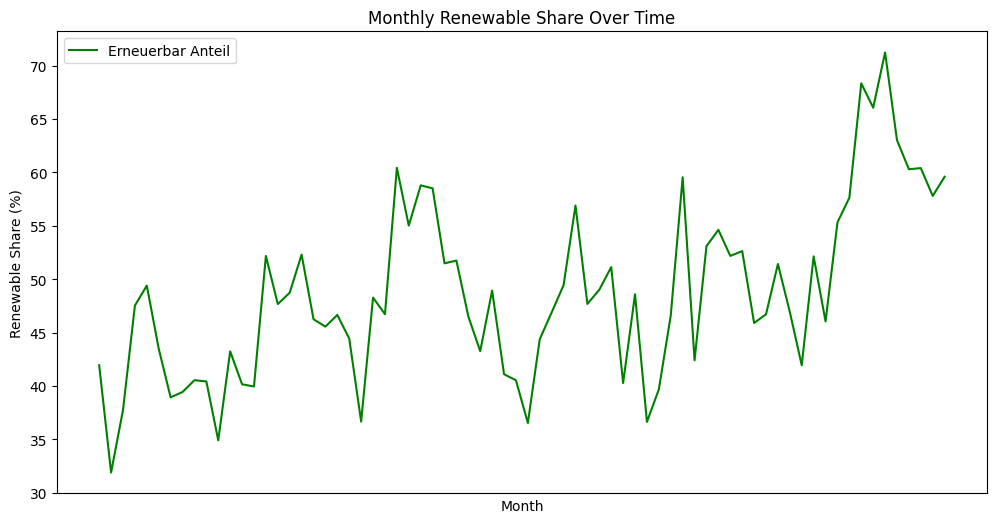

In [19]:
#Finding the monthly renewable share over time
non_renewable_columns = ['Kernenergie(GWh)', 'Braunkohle(GWh)', 'Kohlegas(GWh)', 'Steinkohle(GWh)', 'Öl(GWh)', 'Erdgas(GWh)', 'Nicht-erneuerbarer Müll(GWh)']
renewable_columns = ['Laufwasser(GWh)', 'Biomasse(GWh)', 'Geothermie(GWh)', 'Speicherwasser(GWh)', 'Erneuerbarer Müll(GWh)', 'Wind Offshore(GWh)', 'Wind Onshore(GWh)', 'Solar(GWh)']
df_el['Erneuerbar'] = df_el[renewable_columns].sum(axis=1)
df_el['Nicht-Erneuerbar'] = df_el[non_renewable_columns].sum(axis=1)
df_el['Erneuerbar Anteil'] = (df_el['Erneuerbar'] / (df_el['Erneuerbar'] + df_el['Nicht-Erneuerbar'])) * 100
monthly_renewable_share = df_el.groupby(df_el['Tag'].dt.to_period("M"))['Erneuerbar Anteil'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_renewable_share.index.astype(str), monthly_renewable_share, label='Erneuerbar Anteil', color='green', marker='')

# Set plot labels and title
plt.title('Monthly Renewable Share Over Time')
plt.xlabel('Month')
plt.ylabel('Renewable Share (%)')

plt.xticks([])

plt.legend()

plt.show()

<a id = 34></a>
#### d) Visualisieren und untersuchen Sie den Anteil der Kernenergie an der Nettostromerzeugung im Zeitverlauf.

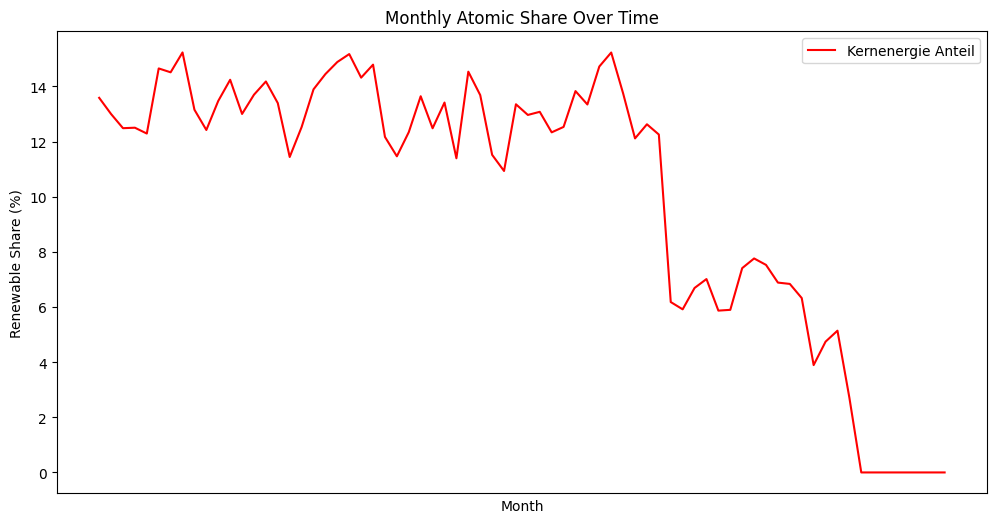

In [20]:
df_el["Kernenergie Anteil"] = (df_el["Kernenergie(GWh)"]/df_el["Gesamtstromerzeugung"])*100

monthly_atomic_energy_share = df_el.groupby(df_el['Tag'].dt.to_period("M"))['Kernenergie Anteil'].mean()

# Plot the line chart
plt.figure(figsize=(12, 6))
plt.plot(monthly_atomic_energy_share.index.astype(str), monthly_atomic_energy_share, label='Kernenergie Anteil', color='red', marker='')

# Set plot labels and title
plt.title('Monthly Atomic Share Over Time')
plt.xlabel('Month')
plt.ylabel('Renewable Share (%)')

plt.xticks([])

# Display the legend
plt.legend()

# Show the plot
plt.show()

#### _Starker Rückgang der Stromerzeugung aus Kernenergie, die in der zweiten Hälfte des Jahres 2023 eingestellt wird._

<a id = 35></a>
#### e) Erstellen Sie ein interaktives Diagramm in Plotly, in dem die zeitlichen Verläufe der Energieerzeugung mit den einzelnen Energieträgern als Liniendiagramm dargestellt werden. Wenden Sie unter Verwendung der Methode DataFrame.rolling einen gleitenden Mittelwert an, um die Zeitreihen zu glätten. Durch Klick auf die Legende sollen die Kurven zu den einzelnen Energietragern aus- und eingeblendet werden können.

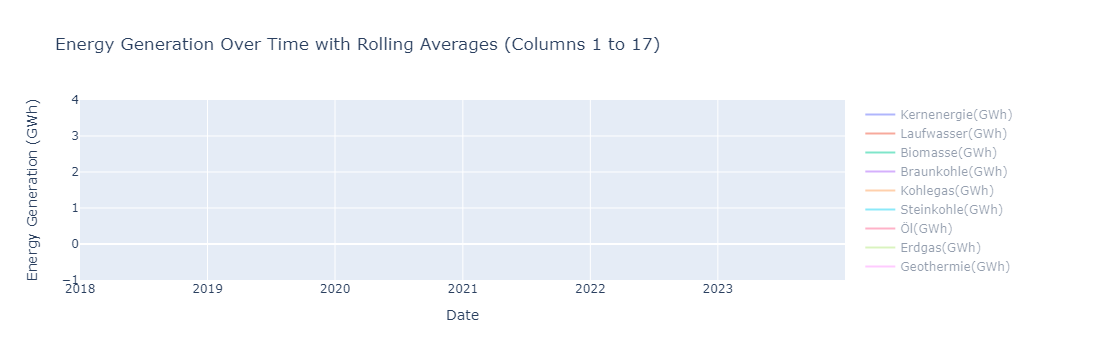

In [21]:
selected_columns = df_el.columns[1:17]

# Calculate rolling averages for each energy carrier
rolling_window = 7
df_el_rolling = df_el[selected_columns].rolling(window=rolling_window).mean()

# Reshape DataFrame for line plotting
df_el_rolling_long = pd.melt(df_el_rolling, value_vars=selected_columns,
                              var_name='Energy Carrier', value_name='Energy Generation (GWh)')

# Create an interactive line plot with Plotly
fig = go.Figure()

for carrier in df_el_rolling_long['Energy Carrier'].unique():
    carrier_data = df_el_rolling_long[df_el_rolling_long['Energy Carrier'] == carrier]
    fig.add_trace(go.Scatter(x=df_el['Tag'], y=carrier_data['Energy Generation (GWh)'],
                             mode='lines', name=carrier, visible='legendonly'))

# Configure the layout for better user interaction
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Energy Generation (GWh)',
    title='Energy Generation Over Time with Rolling Averages (Columns 1 to 17)',
    hovermode='x',
)

fig.update_xaxes(range=['2018-01-01', '2023-12-31'])

# Show the interactive plot
fig.show()

<a id = 36></a>
#### f) Untersuchen Sie mit Hilfe des interaktiven Diagramms, wie sich die Stromerzeugung ausgewählter Energieträger in Deutschland seit 2018 entwickelt hat. Beschreiben Sie jeweils die beobachteten Trends und erklaren Sie diese. Untersuchen Sie insbesondere, wie sich die Energieerzeugung im zeitlichen Zusammenhang mit der Abschaltung der letzten Atomkraftwerke am 15.04.2023 geandert hat.

#### _Deutschland verzeichnet eine kontinuierliche Zunahme des Anteils erneuerbarer Energiequellen wie Wind- und Solarenergie, was einen signifikanten Beitrag zum Gesamtenergiemix leistet. Wir können auch feststellen, dass die Verwendung von Kohle zur Energieerzeugung immer weniger wird. Seit dem Ausstieg aus der Kernenergie ist die Nutzung fast aller anderen Energiequellen, sowohl der erneuerbaren als auch der nicht-erneuerbaren, stark angestiegen._

<a id = 40></a>
# Aufgabe 4: Erzeugter Solarstrom in Abhängigkeit vom Wetter

<a id = 41></a>
#### a) Implementieren Sie eine Funktion namens get_weather_data(lat, lon, start date, end date), die die (tagesbezogenen) Wetterdaten fur die durch (lon,lat) gegebene Geo-Position im Zeitraum zwischen start_date und end date_von der open-meteo-API bezieht und das Ergebnis als DataFrame zurückgibt. Verwenden Sie für den Zugriff auf die API das Paket requests. Jede Zeile des DataFrames soll die Wetterdaten zu einem Tag enthalten. Wenden Sie diese Funktion nun an, um historische Wetterdaten der Jahre 2018-2023 für die Stadt Amberg zu beziehen. Speichern Sie diese in einen DataFrame namens df_weather und verwenden Sie diesen als Datengrundlage fur alle weiteren Teilaufgaben dieser Aufgabe. 

In [22]:
def get_weather_data(lat, lon, start_date, end_date):
    cache_session = requests_cache.CachedSession('.cache', expire_after = -1)
    retry_session = retry(cache_session, retries = 5, backoff_factor = 0.2)
    openmeteo = openmeteo_requests.Client(session = retry_session)

    # Make sure all required weather variables are listed here
    # The order of variables in hourly or daily is important to assign them correctly below
    url = "https://archive-api.open-meteo.com/v1/archive"
    params = {
    	"latitude": lat,
    	"longitude": lon,
    	"start_date": start_date,
    	"end_date": end_date,
    	"daily": ["temperature_2m_max", "temperature_2m_min", "temperature_2m_mean", "daylight_duration", "sunshine_duration", "precipitation_sum", "rain_sum", "snowfall_sum", "precipitation_hours", "wind_speed_10m_max", "wind_gusts_10m_max", "wind_direction_10m_dominant", "shortwave_radiation_sum", "et0_fao_evapotranspiration"]
    }
    responses = openmeteo.weather_api(url, params=params)
    
    # Process first location. Add a for-loop for multiple locations or weather models
    response = responses[0]
    print(f"Coordinates {response.Latitude()}°E {response.Longitude()}°N")
    print(f"Elevation {response.Elevation()} m asl")
    print(f"Timezone {response.Timezone()} {response.TimezoneAbbreviation()}")
    print(f"Timezone difference to GMT+0 {response.UtcOffsetSeconds()} s")
    
    # Process daily data. The order of variables needs to be the same as requested.
    daily = response.Daily()
    daily_temperature_2m_max = daily.Variables(0).ValuesAsNumpy()
    daily_temperature_2m_min = daily.Variables(1).ValuesAsNumpy()
    daily_temperature_2m_mean = daily.Variables(2).ValuesAsNumpy()
    daily_daylight_duration = daily.Variables(3).ValuesAsNumpy()
    daily_sunshine_duration = daily.Variables(4).ValuesAsNumpy()
    daily_precipitation_sum = daily.Variables(5).ValuesAsNumpy()
    daily_rain_sum = daily.Variables(6).ValuesAsNumpy()
    daily_snowfall_sum = daily.Variables(7).ValuesAsNumpy()
    daily_precipitation_hours = daily.Variables(8).ValuesAsNumpy()
    daily_wind_speed_10m_max = daily.Variables(9).ValuesAsNumpy()
    daily_wind_gusts_10m_max = daily.Variables(10).ValuesAsNumpy()
    daily_wind_direction_10m_dominant = daily.Variables(11).ValuesAsNumpy()
    daily_shortwave_radiation_sum = daily.Variables(12).ValuesAsNumpy()
    daily_et0_fao_evapotranspiration = daily.Variables(13).ValuesAsNumpy()
    
    daily_data = {"date": pd.date_range(
    	start = pd.to_datetime(daily.Time(), unit = "s"),
    	end = pd.to_datetime(daily.TimeEnd(), unit = "s"),
    	freq = pd.Timedelta(seconds = daily.Interval()),
    	inclusive = "left"
    )}
    daily_data["temperature_2m_max"] = daily_temperature_2m_max
    daily_data["temperature_2m_min"] = daily_temperature_2m_min
    daily_data["temperature_2m_mean"] = daily_temperature_2m_mean
    daily_data["daylight_duration"] = daily_daylight_duration
    daily_data["sunshine_duration"] = daily_sunshine_duration
    daily_data["precipitation_sum"] = daily_precipitation_sum
    daily_data["rain_sum"] = daily_rain_sum
    daily_data["snowfall_sum"] = daily_snowfall_sum
    daily_data["precipitation_hours"] = daily_precipitation_hours
    daily_data["wind_speed_10m_max"] = daily_wind_speed_10m_max
    daily_data["wind_gusts_10m_max"] = daily_wind_gusts_10m_max
    daily_data["wind_direction_10m_dominant"] = daily_wind_direction_10m_dominant
    daily_data["shortwave_radiation_sum"] = daily_shortwave_radiation_sum
    daily_data["et0_fao_evapotranspiration"] = daily_et0_fao_evapotranspiration
    
    daily_dataframe = pd.DataFrame(data = daily_data)
    
    return daily_dataframe

In [23]:
df_weather = get_weather_data(49.444444, 11.848333, "2018-01-01", "2023-12-31")
df_weather

Coordinates 49.45518112182617°E 11.772805213928223°N
Elevation 387.0 m asl
Timezone None None
Timezone difference to GMT+0 0 s


date  temperature_2m_max  temperature_2m_min  temperature_2m_mean  \
0    2018-01-01            8.876500              2.4765             5.551500   
1    2018-01-02            5.076500              1.6765             2.957750   
2    2018-01-03            8.926499              1.5265             4.874417   
3    2018-01-04            9.826500              3.5765             5.211916   
4    2018-01-05            8.476500              4.7265             6.845249   
...         ...                 ...                 ...                  ...   
2186 2023-12-27            9.176499              3.1265             5.391083   
2187 2023-12-28            9.926499              4.1765             7.136916   
2188 2023-12-29           10.226500              6.2765             8.020250   
2189 2023-12-30            9.276500              2.3265             6.495251   
2190 2023-12-31            6.776500              1.5265             4.014000   

      daylight_duration  sunshine_duration  precipitation_sum   rain_sum  \
0          29705.875000       19056.740234           1.900000   1.800000   
1          29769.371094         848.050049           7.800000   7.600000   
2          29838.087891        8208.342773          12.600001  12.000002   
3          29912.119141           0.000000          19.600000  19.600000   
4          29992.287109        7854.305664           6.100000   6.100000   
...                 ...                ...                ...        ...   
2186       29441.906250       13207.042969           0.000000   0.000000   
2187       29477.560547        3600.000000           1.200000   1.200000   
2188       29519.162109       16838.242188           0.800000   0.800000   
2189       29566.568359       10800.000000           0.200000   0.200000   
2190       29619.671875       10673.505859           0.600000   0.600000   

      snowfall_sum  precipitation_hours  wind_speed_10m_max  \
0             0.07                  6.0           25.671307   
1             0.14                 15.0           29.443069   
2             0.42                 17.0           39.026390   
3             0.00                 22.0           28.829233   
4             0.00                 10.0           28.227306   
...            ...                  ...                 ...   
2186          0.00                  0.0           13.849476   
2187          0.00                  4.0           15.496736   
2188          0.00                  4.0           27.475807   
2189          0.00                  2.0           23.933908   
2190          0.00                  4.0           15.856354   

      wind_gusts_10m_max  wind_direction_10m_dominant  \
0              53.639996                   229.318192   
1              61.560001                   254.377594   
2              91.439995                   243.685028   
3              64.439995                   240.805222   
4              66.239998                   248.188156   
...                  ...                          ...   
2186           30.599998                   180.437332   
2187           32.760002                   230.392944   
2188           53.639996                   241.718796   
2189           48.599998                   247.964890   
2190           32.399998                   182.457886   

      shortwave_radiation_sum  et0_fao_evapotranspiration  
0                        3.36                    0.888918  
1                        1.71                    0.208756  
2                        2.06                    0.711322  
3                        0.71                    0.305298  
4                        2.14                    0.653908  
...                       ...                         ...  
2186                     3.02                    0.472206  
2187                     1.94                    0.821059  
2188                     3.24                    0.796337  
2189                     2.54                    0.755257  
2190                     3.21      

<a id = 42></a>
#### b) Untersuchen Sie die verschiedenen Variablen des Wetterdatensatzes auf Korrelationen, in dem Sie eine interaktive CorrelationHeatmap in Plotly erzeugen.

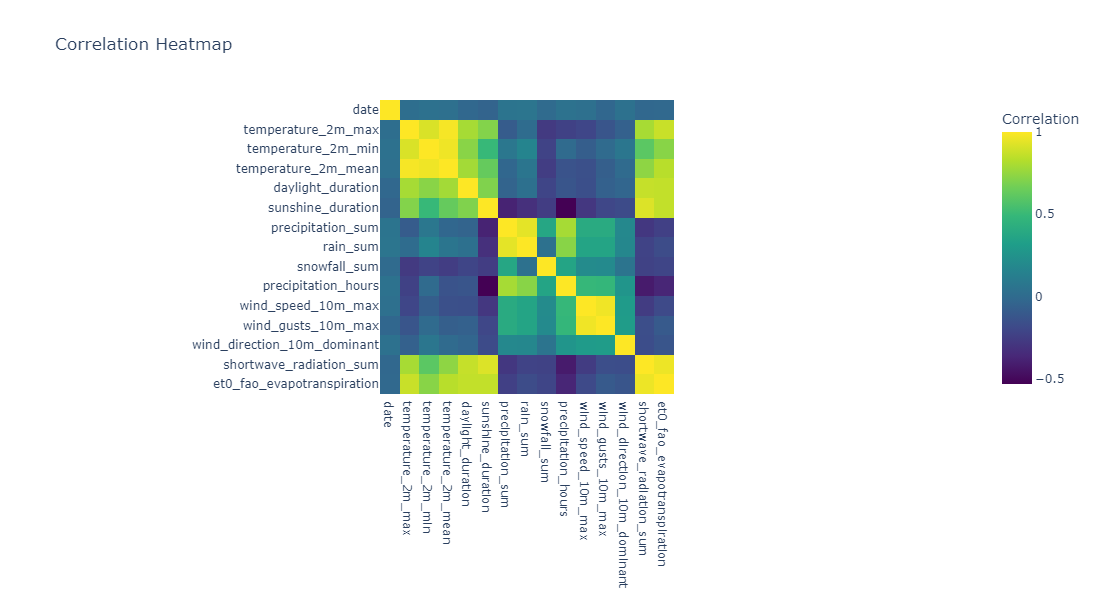

In [24]:
correlation_matrix = df_weather.corr()

# Create the interactive correlation heatmap 
fig = px.imshow(correlation_matrix,
                x=correlation_matrix.columns,
                y=correlation_matrix.columns,
                color_continuous_scale='Viridis',
                title='Correlation Heatmap',
                labels=dict(color='Correlation'))

# Make the diagramm bigger
fig.update_layout(
    autosize=False,
    width=800,
    height=600,
)

# Show the interactive plot
fig.show()

<a id = 43></a>
#### c) Ermitteln Sie für jedes Jahr des Betrachtungszeitraums die Anzahl der Sonnenscheinstunden und die jahrliche Sonneneinstrahlung.

In [25]:
df_weather['year'] = df_weather['date'].dt.year

# Group by year and calculate the sum of sunshine hours and solar radiation
annual_sunshine_hours = (df_weather.groupby('year')['sunshine_duration'].sum()/3600).round(0)
annual_solar_radiation = df_weather.groupby('year')['shortwave_radiation_sum'].sum().round(0)

# Create a DataFrame for the results
df_annual_solar = pd.DataFrame({
    'Jahr': annual_sunshine_hours.index,
    'Sonnenscheinstunden': annual_sunshine_hours.values,
    'Sonneneinstrahlung': annual_solar_radiation.values,
})

df_annual_solar

Jahr  Sonnenscheinstunden  Sonneneinstrahlung
0  2018               2877.0              4556.0
1  2019               2753.0              4435.0
2  2020               2759.0              4319.0
3  2021               2674.0              4275.0
4  2022               2805.0              4591.0
5  2023               2654.0              4448.0

<a id = 44></a>
#### d) Erzeugen Sie für jedes Jahr des Betrachtungszeitraums ein Säulendiagramm, in dem die aggregierte Sonneneinstrahlung pro Monat auftragen ist. Ordnen Sie die sechs Diagramme mit Hilfe von pyplot.subplots in einem Raster der Dimension 2×3 an.

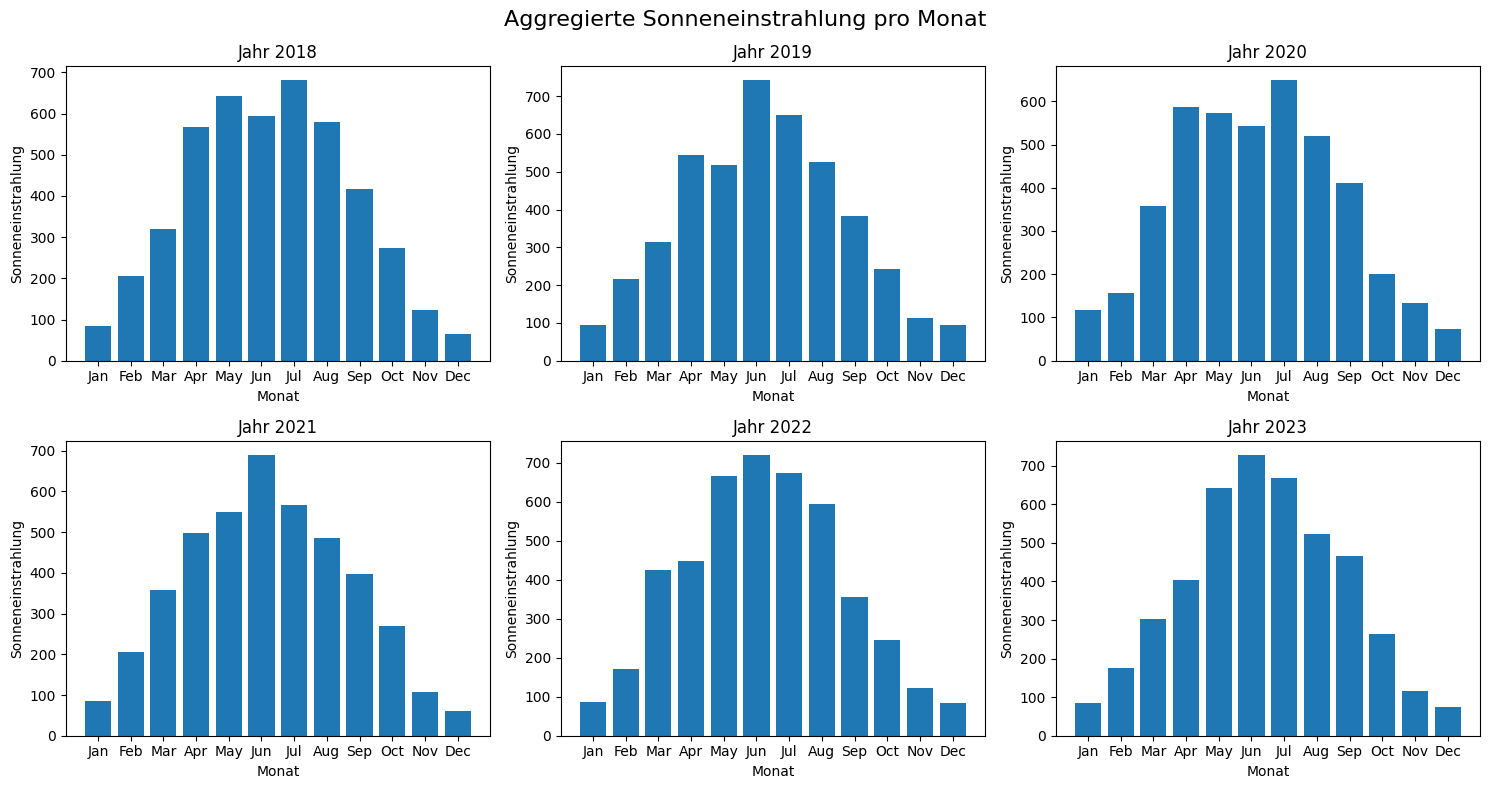

In [26]:
df_weather['month'] = df_weather['date'].dt.month

# Group by year and month, then sum the solar radiation
monthly_solar_radiation = df_weather.groupby(['year', 'month'])['shortwave_radiation_sum'].sum().reset_index()

# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
fig.suptitle('Aggregierte Sonneneinstrahlung pro Monat', fontsize=16)

# Iterate through years and plot the bar chart for each
for i, year in enumerate(monthly_solar_radiation['year'].unique()):
    year_data = monthly_solar_radiation[monthly_solar_radiation['year'] == year]
    ax = axes[i // 3, i % 3]
    ax.bar(year_data['month'], year_data['shortwave_radiation_sum'])
    ax.set_title(f'Jahr {year}')
    ax.set_xlabel('Monat')
    ax.set_ylabel('Sonneneinstrahlung')

    # Customize x-axis ticks to display month abbreviations
    month_abbr = [calendar.month_abbr[m] for m in year_data['month']]
    ax.set_xticks(year_data['month'])
    ax.set_xticklabels(month_abbr)

#Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

<a id = 45></a>
#### e) Visualisieren Sie in geeigneten Diagrammen die maximale Tagestemperatur, die Sonnenscheindauer und die Sonneneinstrahlung pro Tag im Betrachtungszeitraum.

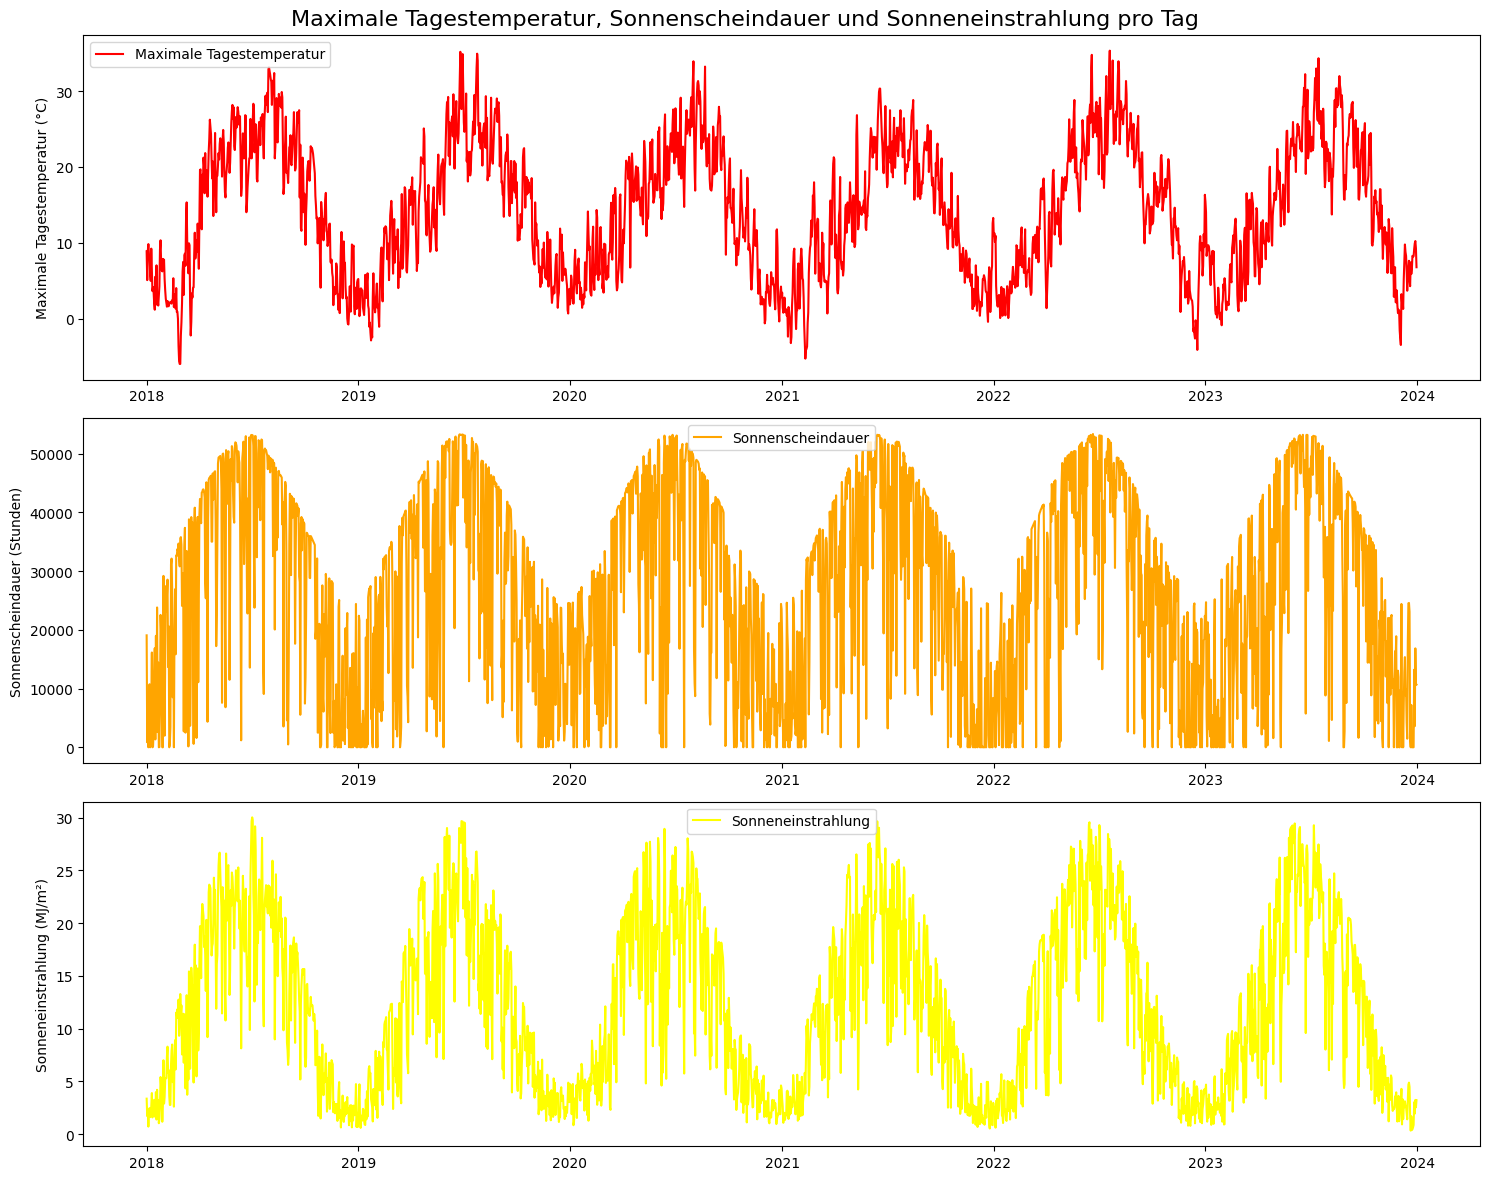

In [27]:
# Assuming df_weather contains the relevant daily data

# Create line charts for each variable
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(15, 12))
fig.suptitle('Maximale Tagestemperatur, Sonnenscheindauer und Sonneneinstrahlung pro Tag', fontsize=16)

# Plot daily maximum temperature
axes[0].plot(df_weather['date'], df_weather['temperature_2m_max'], marker='', label='Maximale Tagestemperatur', color='red')
axes[0].set_ylabel('Maximale Tagestemperatur (°C)')
axes[0].legend()

# Plot daily sunshine duration
axes[1].plot(df_weather['date'], df_weather['sunshine_duration'], marker='', label='Sonnenscheindauer', color='orange')
axes[1].set_ylabel('Sonnenscheindauer (Stunden)')
axes[1].legend()

# Plot daily solar radiation
axes[2].plot(df_weather['date'], df_weather['shortwave_radiation_sum'], marker='', label='Sonneneinstrahlung', color='yellow')
axes[2].set_ylabel('Sonneneinstrahlung (MJ/m²)')
axes[2].legend()

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()


<a id = 46></a>
#### f) Untersuchen Sie anhand der Ergebnisse der vorherigen drei Teilaufgaben die wesentlichen Entwicklungen und Trends für die Sonneinscheindauer, Sonneneinstrahlung und Temperaturen im Betrachtungszeitraum.

#### _Wir stellen fest, dass die drei Werte stark miteinander verbunden sind. Аlle drei sind im Sommer maximal und im Winter minimal._

<a id = 47></a>
#### g) Untersuchen Sie nun die Zusammenhänge zwischen den sonnenbezogenen Wettervariablen (exemplarisch betrachtet für die Stadt Amberg) und dem in Deutschland pro Tag erzeugten Solarstrom. Visualisieren und quantifizieren Sie diese geeignet. 

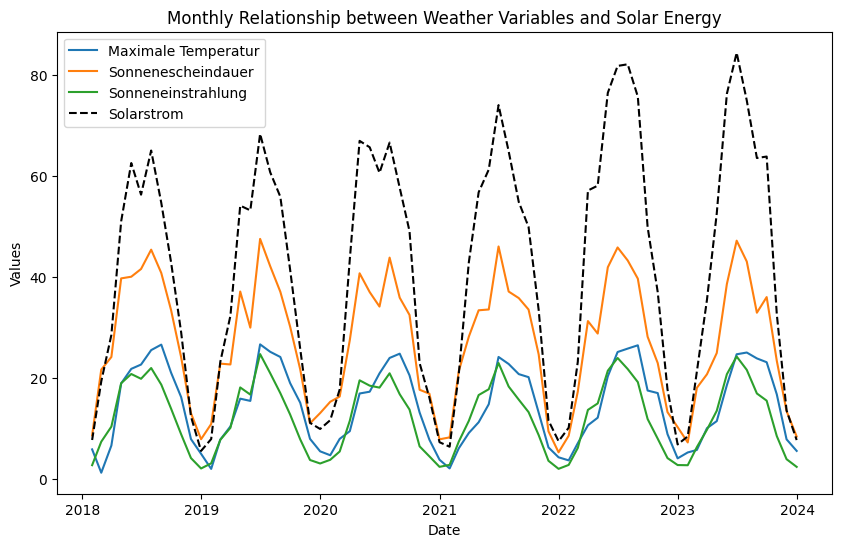

In [28]:
df_weather_monthly = df_weather.resample('M', on='date').mean()
df_el_monthly = df_el.resample('M', on='Tag').sum()

# Plotting
plt.figure(figsize=(10, 6))

# Plot each weather variable
plt.plot(df_weather_monthly.index, df_weather_monthly['temperature_2m_max'], label='Maximale Temperatur')
plt.plot(df_weather_monthly.index, df_weather_monthly['sunshine_duration']/1000, label='Sonnenescheindauer')
plt.plot(df_weather_monthly.index, df_weather_monthly['shortwave_radiation_sum'], label='Sonneneinstrahlung')

# Plot solar energy
plt.plot(df_el_monthly.index, df_el_monthly['Solar(GWh)']/100, label='Solarstrom', linestyle='--', color='black')

# Adding labels and legend
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Monthly Relationship between Weather Variables and Solar Energy')
plt.legend()

# Show the plot
plt.show()

#### _Hier sehen wir, dass die vier Variablen stark korreliert sind, wobei die Spitzen der Solarenergieproduktion mit den Spitzen der Temperatur, der Sonnenscheindauer und der Sonneneinstrahlung zusammenfallen._

<a id = 50></a>
# Aufgabe 5: Photovoltaik-Ausbau in Deutschland

<a id = 51></a>
#### a) Auf Moodle finden Sie einen Auszug des Marktstammdatenregisters mit Angaben zu allen Photovoltaikanlagen in Deutschland. Laden Sie sich die CSV-Dateien herunter, lesen Sie sie ein und führen Sie sie in einen DataFrame namens df_pv zusammen.

In [29]:
df_pv = concatenate_csv_files(r"Daten\Stromerzeugungseinheiten", r"EinheitenSolar", 1, 38)
df_pv

C:\Users\cveta\AppData\Local\Temp\ipykernel_24552\648157975.py:4: DtypeWarning:

Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.



EinheitMastrNummer    DatumLetzteAktualisierung  \
0          SEE984033548619  2020-02-20T16:28:35.2508122   
1          SEE901901460125  2021-07-15T07:54:37.8637095   
2          SEE983679054270  2019-05-28T08:26:38.0316692   
3          SEE978732598938  2020-12-07T08:19:07.9860793   
4          SEE970592691989  2021-01-25T11:18:30.0433603   
...                    ...                          ...   
3733286    SEE962666487727  2023-12-31T22:59:11.7688148   
3733287    SEE927730726591  2023-12-31T23:10:22.2034456   
3733288    SEE968204214268  2023-12-31T23:20:05.7126888   
3733289    SEE939492601771  2024-01-01T00:37:48.5759672   
3733290    SEE951511396703  2024-01-01T00:25:54.8339677   

        AnlagenbetreiberMastrNummer           Bundesland  Postleitzahl  \
0                   ABR949444220202  Nordrhein-Westfalen       48147.0   
1                   ABR930055871044    Baden-Württemberg       73529.0   
2                   ABR983885950021          Brandenburg       14641.0   
3                   ABR980052996196               Bayern       93080.0   
4                   ABR970373690446             Saarland       66740.0   
...                             ...                  ...           ...   
3733286             ABR902834890140          Brandenburg       16827.0   
3733287             ABR996492371288        Niedersachsen       37520.0   
3733288             ABR934043306792  Nordrhein-Westfalen       45896.0   
3733289             ABR959875806043            Thüringen       99310.0   
3733290             ABR989059076832               Hessen       63179.0   

                      Ort Registrierungsdatum EinheitBetriebsstatus  \
0                 Münster          2019-02-01            In Betrieb   
1        Schwäbisch Gmünd          2019-01-31            In Betrieb   
2                   Nauen          2019-01-31            In Betrieb   
3                Pentling          2019-01-31            In Betrieb   
4               Saarlouis          2019-01-31            In Betrieb   
...                   ...                 ...                   ...   
3733286           Krangen          2023-12-31            In Betrieb   
3733287          Osterode          2024-01-01            In Betrieb   
3733288     Gelsenkirchen          2024-01-01            In Betrieb   
3733289          Arnstadt          2024-01-01            In Planung   
3733290      Obertshausen          2024-01-01            In Betrieb   

        Inbetriebnahmedatum                 NameStromerzeugungseinheit  \
0                2007-07-20                  Photovoltaikanlage ERWin4   
1                2013-01-31                                  man-power   
2                2016-02-19                                 eigene PVA   
3                2016-12-16  Photovoltaik EFH Löbert - Mattinger Weg 6   
4                2011-12-08                       PV-Anlage 7,2 (Voll)   
...                     ...                                        ...   
3733286          2023-11-15                                  PVKrangen   
3733287          2023-07-08                       Solaranlage Sperling   
3733288          2024-01-01                                Garagendach   
3733289                 NaN                                 Dachanlage   
3733290          2024-01-01                            Balkonkraftwerk   

         Bruttoleistung  AnzahlModule    Lage  Leistungsbegrenzung  \
0                  3.96          22.0   853.0                802.0   
1                  7.41          38.0   853.0                803.0   
2                  5.04          16.0   853.0                803.0   
3                  6.36          24.0   853.0               1535.0   
4                  7.20          30.0   853.0                802.0   
...                 ...           ...     ...                  ...   
3733286           10.60          25.0   853.0                802.0   
3733287           14.76          36.0   853.0                802.0   
3733288            0.80           2.0 

<a id = 52></a>
#### b) Untersuchen Sie die Qualitat des Datensatzes und bereiten Sie diesen für die weiteren Analysen geeignet vor.

In [30]:
df_pv.dtypes

EinheitMastrNummer              object
DatumLetzteAktualisierung       object
AnlagenbetreiberMastrNummer     object
Bundesland                      object
Postleitzahl                   float64
Ort                             object
Registrierungsdatum             object
EinheitBetriebsstatus           object
Inbetriebnahmedatum             object
NameStromerzeugungseinheit      object
Bruttoleistung                 float64
AnzahlModule                   float64
Lage                           float64
Leistungsbegrenzung            float64
Hauptausrichtung               float64
Strasse                         object
Hausnummer                      object
Laengengrad                    float64
Breitengrad                    float64
dtype: object

In [31]:
missing_values_percentage_per_column = (df_pv.isnull().sum() / len(df_pv)) * 100
missing_values_percentage_per_column

EinheitMastrNummer              0.000000
DatumLetzteAktualisierung       0.000000
AnlagenbetreiberMastrNummer     0.170198
Bundesland                      0.000884
Postleitzahl                    0.000054
Ort                             0.000054
Registrierungsdatum             0.000000
EinheitBetriebsstatus           0.000000
Inbetriebnahmedatum             1.581527
NameStromerzeugungseinheit      0.000321
Bruttoleistung                  0.000000
AnzahlModule                    2.331026
Lage                            0.001500
Leistungsbegrenzung             2.700888
Hauptausrichtung                1.517455
Strasse                        94.747637
Hausnummer                     94.942639
Laengengrad                    94.416428
Breitengrad                    94.416428
dtype: float64

#### _Da die Spalten Strasse, Hausnummer, Laengengrad und Breitengrad zu 95 % leer sind, werden sie aus dem DataFrame entfernt._

In [32]:
df_pv = df_pv.iloc[:, :-4]

df_pv['EinheitMastrNummer'] = df_pv['EinheitMastrNummer'].astype('string')
df_pv['DatumLetzteAktualisierung'] = pd.to_datetime(df_pv['DatumLetzteAktualisierung'])
df_pv['AnlagenbetreiberMastrNummer'] = df_pv['AnlagenbetreiberMastrNummer'].astype('string')
df_pv['Bundesland'] = df_pv['Bundesland'].astype('string')
df_pv['Ort'] = df_pv['Ort'].astype('string')
df_pv['Registrierungsdatum'] = pd.to_datetime(df_pv['Registrierungsdatum'])
df_pv['EinheitBetriebsstatus'] = df_pv['EinheitBetriebsstatus'].astype('string')
df_pv['Inbetriebnahmedatum'] = pd.to_datetime(df_pv['Inbetriebnahmedatum'])
df_pv['NameStromerzeugungseinheit'] = df_pv['NameStromerzeugungseinheit'].astype('string')

df_pv.dtypes

EinheitMastrNummer             string[python]
DatumLetzteAktualisierung      datetime64[ns]
AnlagenbetreiberMastrNummer    string[python]
Bundesland                     string[python]
Postleitzahl                          float64
Ort                            string[python]
Registrierungsdatum            datetime64[ns]
EinheitBetriebsstatus          string[python]
Inbetriebnahmedatum            datetime64[ns]
NameStromerzeugungseinheit     string[python]
Bruttoleistung                        float64
AnzahlModule                          float64
Lage                                  float64
Leistungsbegrenzung                   float64
Hauptausrichtung                      float64
dtype: object

<a id = 53></a>
#### c) Wie viele Photovoltaikanlagen sind derzeit insgesamt und pro Bundesland in Betrieb? Verwenden Sie für die weiteren Analysen nur diese Anlagen.

In [33]:
df_pv = df_pv[df_pv['EinheitBetriebsstatus'] == 'In Betrieb']
total_pv_plants = len(df_pv)
print(f"Gesamtzahl der Photovoltaikanlagen: {total_pv_plants}")
print("-------------------------------------------------------------")
pv_plants_by_state = df_pv['Bundesland'].value_counts()
pv_plants_by_state

Gesamtzahl der Photovoltaikanlagen: 3661547
-------------------------------------------------------------


Bundesland
Bayern                             936440
Nordrhein-Westfalen                650194
Baden-Württemberg                  617978
Niedersachsen                      383833
Hessen                             238412
Rheinland-Pfalz                    211901
Sachsen                            121243
Schleswig-Holstein                 113365
Brandenburg                        102626
Sachsen-Anhalt                      76853
Thüringen                           68878
Mecklenburg-Vorpommern              53566
Saarland                            41835
Berlin                              25866
Hamburg                             12209
Bremen                               6322
Ausschließliche Wirtschaftszone         3
Name: count, dtype: Int64

<a id = 54></a>
#### d) Berechnen Sie den Mittelwert und den Median der Bruttoleistungen und erläutern Sie Ihre Beobachtung.

In [34]:
mean_bruttoleistung = df_pv['Bruttoleistung'].mean()
median_bruttoleistung = df_pv['Bruttoleistung'].median()

print(f'Mittelwert der Bruttoleistungen: {mean_bruttoleistung}')
print(f'Median der Bruttoleistungen: {median_bruttoleistung}')

Mittelwert der Bruttoleistungen: 22.33758788976354
Median der Bruttoleistungen: 8.56


#### _Wenn der Mittelwert größer ist als der Median, bedeutet das, dass die Mehrheit der Datenpunkte sich auf der linken Seite konzentriert, aber größerer Werte auf der rechten Seite konzentrieren._

<a id = 55></a>
#### e) Geben Sie die zehn Anlagen mit der höchsten Bruttonennleistung aus.

In [35]:
top_10_power_plants = df_pv.nlargest(10, 'Bruttoleistung')
top_10_power_plants[['Ort', 'Bundesland', 'Bruttoleistung']]

Ort              Bundesland  Bruttoleistung
1459384       Neuhardenberg             Brandenburg       153131.42
1458856          Neutrebbin             Brandenburg       150983.04
3504238       Neukieritzsch                 Sachsen       109712.93
2224265              Barnin  Mecklenburg-Vorpommern        88680.54
2224261              Barnin  Mecklenburg-Vorpommern        82924.14
854182          Plau am See  Mecklenburg-Vorpommern        70863.87
1921292          Werneuchen             Brandenburg        63060.96
358238           Werneuchen             Brandenburg        62147.28
1544111          Werneuchen             Brandenburg        61838.40
3029411  Boitzenburger Land             Brandenburg        60261.96

<a id = 56></a>
#### f) Ermitteln und visualisieren Sie den monatlichen Zubau der Bruttonennleistung pro Monat seit dem Jahr 2015. Beschreiben Sie die Entwicklung und ordnen Sie diese in den Kontext politischer und wirtschaftlicher Rahmenbedingungen ein. 

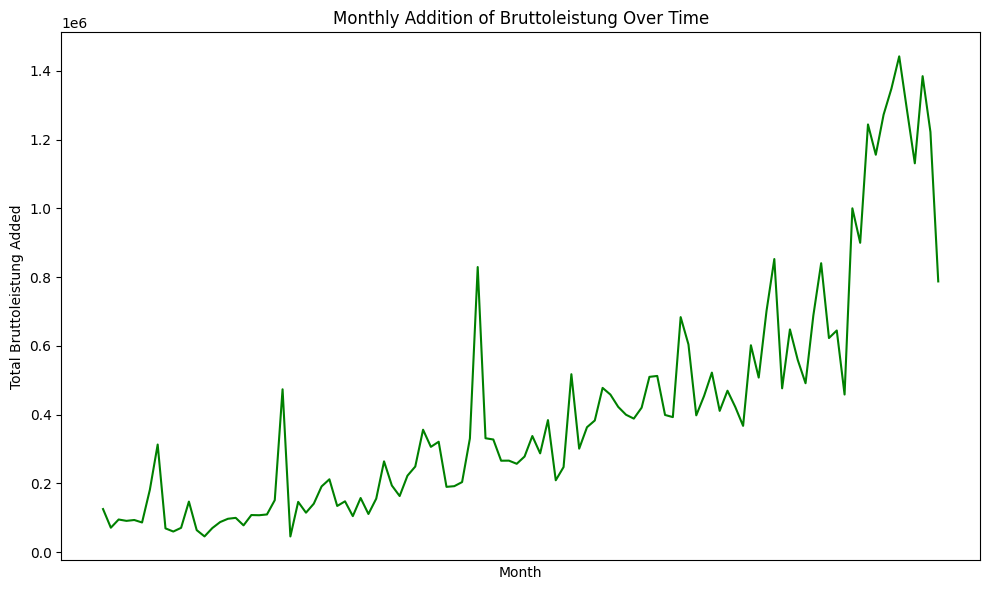

In [36]:
df_pv['Jahr'] = df_pv['Inbetriebnahmedatum'].dt.year
df_pv['Monat'] = df_pv['Inbetriebnahmedatum'].dt.month
df_monthly_addition = df_pv[(df_pv['Jahr'] >= 2015) & (df_pv['Jahr'] <= 2023)].groupby(['Jahr', 'Monat'])['Bruttoleistung'].sum().reset_index()

#Plotting the monthly accumulation of the 'Bruttoleistung'
plt.figure(figsize=(10, 6))
plt.plot(df_monthly_addition['Jahr'].astype(str) + '-' + df_monthly_addition['Monat'].astype(str), df_monthly_addition['Bruttoleistung'], marker='', linestyle='-', color='green')
plt.title('Monthly Addition of Bruttoleistung Over Time')
plt.xlabel('Month')
plt.ylabel('Total Bruttoleistung Added')
plt.xticks([])
plt.tight_layout()
plt.show()

<a id = 57></a>
#### g) Ermitteln Sie die in Deutschland installierte Bruttoleistung im Zeitverlauf seit dem Jahr 2000 und visualisieren Sie diese in einem geeigneten Diagramm.

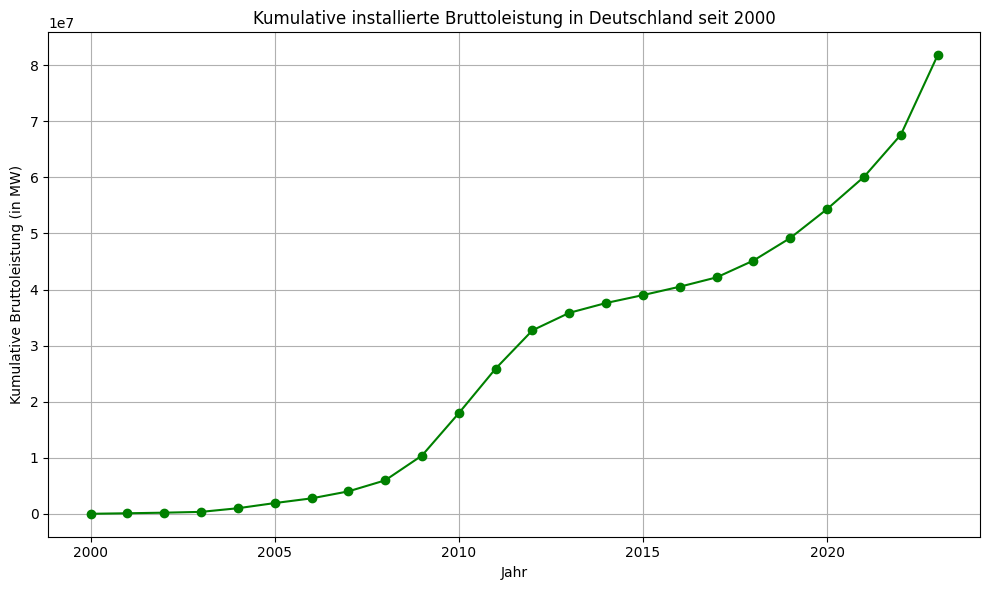

In [37]:
# Filtering data for photovoltaic installations from the year 2000 to 2023
df_since_2000_to_2024 = df_pv[(df_pv['Inbetriebnahmedatum'].dt.year >= 2000) & (df_pv['Inbetriebnahmedatum'].dt.year <= 2023)]

# Grouping the filtered data by year and calculating the sum of 'Bruttoleistung' (gross capacity) for each year
df_yearly_capacity = df_since_2000_to_2024.groupby(df_since_2000_to_2024['Inbetriebnahmedatum'].dt.year)['Bruttoleistung'].sum().reset_index()

# Renaming columns for better clarity
df_yearly_capacity.columns = ['Jahr', 'Gesamt-Bruttoleistung']

# Adding a new column for cumulative gross capacity by summing the values cumulatively
df_yearly_capacity['Kumulative Bruttoleistung'] = df_yearly_capacity['Gesamt-Bruttoleistung'].cumsum()

# Plotting the cumulative gross capacity over the years
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_capacity['Jahr'], df_yearly_capacity['Kumulative Bruttoleistung'], marker='o', linestyle='-', color='green')
plt.title('Kumulative installierte Bruttoleistung in Deutschland seit 2000')
plt.xlabel('Jahr')
plt.ylabel('Kumulative Bruttoleistung (in MW)')
plt.grid(True)
plt.tight_layout()
plt.show()

<a id = 58></a>
#### h) Berechnen und visualisieren Sie die derzeit installierte Bruttoleistung pro Bundesland. Erstellen Sie dazu unter Verwendung von folium eine Choroplethen-Karte von Deutschland, in der die Bruttoleistung der einzelnen Bundesländer farblich dargestellt wird. Ein Geo-Json-File steht in Moodle zum Download bereit. Beschreiben Sie anhand der Karte die regionale Verteilung der PV Leistung.

In [38]:
# Path to the GeoJSON file containing boundaries of German states
geojson_path = r"Daten\bundeslaender_geo.json"

# Create a base map centered on Germany
map_pv = folium.Map(location=[51.1657, 10.4515], zoom_start=6)  # Coordinates for Germany

# Add a Choropleth layer to represent photovoltaic plant data by state
folium.Choropleth(
    geo_data=geojson_path,
    name='choropleth',
    data=pv_plants_by_state,
    columns=['Bundesland', 'Bruttoleistung'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',  # Choose a color palette that effectively represents your data
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Bruttoleistung (MWp)',  # Legend title
    encoding='UTF-16'  # Specify the encoding format of the GeoJSON file
).add_to(map_pv)

# Add a layer control to toggle the Choropleth layer on/off
folium.LayerControl().add_to(map_pv)

# Save the map as an HTML file
map_pv.save('solar_power_map.html')

# Open the saved HTML file in the default web browser
os.system('start solar_power_map.html')


0

#### _Auf der Karte sehen wir, dass die Bruttoleistung in Bayern am höchsten ist und auch, dass sie in den Ostdeutsche Länder deutlich geringer ist als im Westen._

<a id = 591></a>
#### i) Der Anlagenname kann durch den Betreiber selbst gewählt werden. Untersuchen Sie typische Namen fur die PV-Anlagen, indem Sie mit Hilfe des Pakets WordCloud eine Wortwolke für die Anlagennamen erstellen.

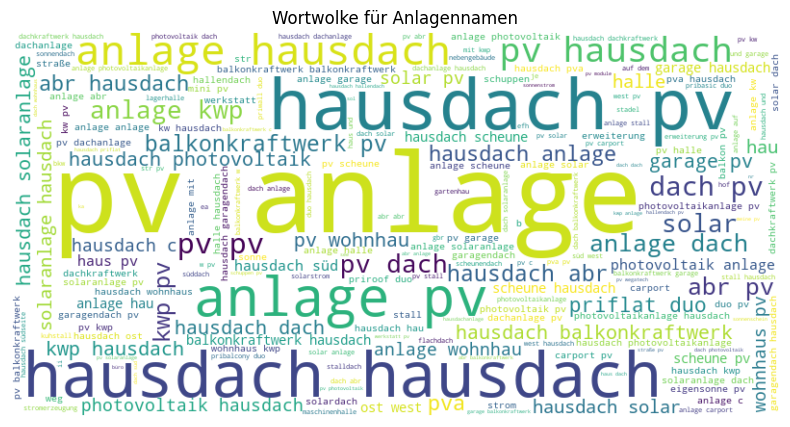

In [39]:
def preprocess_text(text):
    if pd.notna(text):
        # Remove non-alphabetic characters
        cleaned_text = ''.join(char.lower() if char.isalpha() or char.isspace() else ' ' for char in str(text))
        return cleaned_text
    else:
        return ''

# Apply preprocessing to the 'Anlagenname' column
df_pv['Cleaned_Name'] = df_pv['NameStromerzeugungseinheit'].apply(preprocess_text)

# Generate a WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_pv['Cleaned_Name']))

# Plot the WordCloud image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Wortwolke für Anlagennamen')
plt.show()

<a id = 592></a>
#### j) Untersuchen Sie nun den Zusammenhang zwischen der an einem Tag installierten Leistung und den an diesem Tag erzeugten Solarstrom. Führen Sie dazu die Stromerzeugungsdaten und die Daten zur installierten Bruttoleistung geeignet zusammen. Laden Sie den resultierenden Datensatz als CSV-Datei namens erzeugung_leistung.csv zusammen mit Ihrer Abgabe auf Moodle hoch.

In [40]:
# Filter data for photovoltaic installations from the year 2000 to 2023
df_since_2000_to_2024 = df_pv[(df_pv['Inbetriebnahmedatum'].dt.year >= 2000) & (df_pv['Inbetriebnahmedatum'].dt.year <= 2023)]

# Group data by date, summing the daily gross capacity of photovoltaic plants
df_daily_capacity = df_since_2000_to_2024.groupby(df_since_2000_to_2024['Inbetriebnahmedatum'].dt.date)['Bruttoleistung'].sum().reset_index()

# Rename columns for clarity
df_daily_capacity.columns = ['Datum', 'Tages-Bruttoleistung']

# Calculate cumulative daily gross capacity
df_daily_capacity['Kumulative Tages-Bruttoleistung'] = df_daily_capacity['Tages-Bruttoleistung'].cumsum()

# Rename 'Datum' to 'Tag' and convert 'Tag' to datetime format
df_daily_capacity.rename(columns={'Datum': 'Tag'}, inplace=True)
df_daily_capacity['Tag'] = pd.to_datetime(df_daily_capacity['Tag'], format='%Y-%m-%d')

# Combine daily photovoltaic capacity data with another DataFrame 'df_el' on the 'Tag' column
df_combined = pd.merge(df_daily_capacity, df_el, on='Tag', how='inner')

# Drop redundant 'Tages-Bruttoleistung' column
df_combined.drop(columns=['Tages-Bruttoleistung'], inplace=True)

# Save the combined DataFrame to a CSV file
file_path = 'erzeugung_leistung.csv'
df_combined.to_csv(file_path, index=False)

df_combined


Tag  Kumulative Tages-Bruttoleistung  Kernenergie(GWh)  \
0    2018-01-01                     4.217675e+07             156.8   
1    2018-01-02                     4.220579e+07             220.9   
2    2018-01-03                     4.221368e+07             196.0   
3    2018-01-04                     4.222204e+07             216.8   
4    2018-01-05                     4.223208e+07             209.6   
...         ...                              ...               ...   
2186 2023-12-27                     8.173539e+07               0.0   
2187 2023-12-28                     8.174170e+07               0.0   
2188 2023-12-29                     8.174739e+07               0.0   
2189 2023-12-30                     8.175011e+07               0.0   
2190 2023-12-31                     8.175106e+07               0.0   

      Laufwasser(GWh)  Biomasse(GWh)  Braunkohle(GWh)  Kohlegas(GWh)  \
0               46.70         126.60           204.50        8.90000   
1               47.10         128.30           355.10       10.40000   
2               48.80         127.70           248.00        8.30000   
3               51.80         128.40           319.90        9.10000   
4               52.00         128.70           338.50        9.00000   
...               ...            ...              ...            ...   
2186            58.08         120.08           109.89        7.58863   
2187            56.76         121.76            77.25        7.58863   
2188            54.64         122.82            74.39        7.58863   
2189            53.26         123.31            78.90        7.58863   
2190            53.86         124.90            78.01        7.58863   

      Steinkohle(GWh)  Öl(GWh)  Erdgas(GWh)  ...  Gesamtstromerzeugung  \
0               43.60     2.30        66.30  ...            1403.70000   
1              107.60     2.40       117.90  ...            1495.70000   
2               65.30     2.30        92.10  ...            1748.80000   
3              176.60     2.30       113.20  ...            1650.80000   
4              192.90     2.30       123.40  ...            1646.90000   
...               ...      ...          ...  ...                   ...   
2186            43.47     9.61       125.11  ...            1052.90863   
2187            59.71    10.48        77.81  ...            1470.41863   
2188            60.77     9.31        71.84  ...            1507.84863   
2189            53.99     9.37        79.68  ...            1237.97863   
2190            48.26     9.43        70.11  ...            1205.25863   

      Gesamte Windstromerzeugung  Jahr  Solaranteil  Monat  Wochentag  \
0                         686.00  2018     2.215573      1          0   
1                         457.10  2018     1.149963      1          1   
2                         912.50  2018     0.789113      1          2   
3                         589.50  2018     0.593652      1          3   
4                         540.30  2018     1.177971      1          4   
...                          ...   ...          ...    ...        ...   
2186                      488.88  2023     4.905459     12          2   
2187                      991.41  2023     2.206855     12          3   
2188                     1040.93  2023     2.024076     12          4   
2189                      748.48  2023     3.829630     12          5   
2190                      751.01  2023     2.186253     12          6   

      Erneuerbar  Nicht-Erneuerbar  Erneuerbar Anteil  Kernenergie Anteil  
0         905.00         497.50000          64.527629           11.170478  
1         664.60         829.50000          44.481628           14.769004  
2        1119.00         628.40000          64.037999           11.207685  
3         795.50         853.80000          48.232584           13.133026  
4         755.10         890.40000          45.888788           12.726942  
...          ...               ...                ...                 ...  
2186    

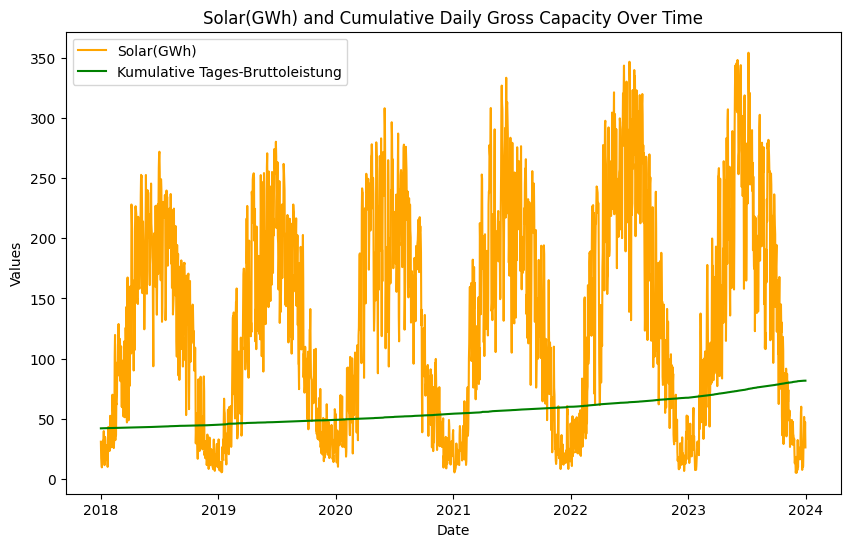

In [41]:
# Create a figure with a specified size
plt.figure(figsize=(10, 6))

# Plot the 'Solar(GWh)' data over time
plt.plot(df_combined['Tag'], df_combined['Solar(GWh)'], label='Solar(GWh)', color='orange')

# Plot the cumulative daily gross capacity in million watts over time
plt.plot(df_combined['Tag'], df_combined['Kumulative Tages-Bruttoleistung']/1000000, label='Kumulative Tages-Bruttoleistung', color='green')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Solar(GWh) and Cumulative Daily Gross Capacity Over Time')

plt.legend()

plt.show()


<a id = 60></a>
# Aufgabe 6: Modellbildung

<a id = 61></a>
#### a) Erstellen Sie anhand der gegebenen historischen Daten fur die Jahre 2018-2023 ein Lineares Regressionsmodell, das den an einem Tag in Deutschland erzeugten Solarstrom (vgl. Aufgabe 1) in Abhangigkeit der zu diesem Zeitpunkt installierten Bruttoleistung für Photovoltaik (vgl. Aufgabe 5) sowie der Tageslicht-Dauer, der Sonnenschein-Dauer und der Sonneneinstrahlung über Amberg (vgl. Aufgabe 4) prognostiziert. Führen Sie dazu zunächst die Daten geeignet zusammen. Laden Sie den resultierenden Datensatz als CSV-Datei namens dataset_model.csv mit Ihrer Abgabe auf Moodle hoch. Teilen Sie die Daten anschließend in eine Trainings- und eine Testdatenmenge auf und erstellen Sie unter Verwendung der Bibliothek Scikit-learn auf dem Trainingsdatensatz das Modell. Beurteilen Sie die Güte des resultierenden Modells, indem Sie den mittleren relativen Fehler (mean absolute percentage error) auf dem Trainings- und auf dem Testdatensatz auswerten.

In [42]:
# Rename the 'date' column to 'Tag' in the 'df_weather' DataFrame
df_weather.rename(columns={'date': 'Tag'}, inplace=True)

# Merge the 'df_combined' DataFrame with the 'df_weather' DataFrame based on the 'Tag' column using an outer join
df_combined = pd.merge(df_combined, df_weather, on='Tag', how='outer')

df_combined.columns


Index(['Tag', 'Kumulative Tages-Bruttoleistung', 'Kernenergie(GWh)',
       'Laufwasser(GWh)', 'Biomasse(GWh)', 'Braunkohle(GWh)', 'Kohlegas(GWh)',
       'Steinkohle(GWh)', 'Öl(GWh)', 'Erdgas(GWh)', 'Geothermie(GWh)',
       'Speicherwasser(GWh)', 'Andere(GWh)', 'Erneuerbarer Müll(GWh)',
       'Nicht-erneuerbarer Müll(GWh)', 'Wind Offshore(GWh)',
       'Wind Onshore(GWh)', 'Solar(GWh)', 'Gesamtstromerzeugung',
       'Gesamte Windstromerzeugung', 'Jahr', 'Solaranteil', 'Monat',
       'Wochentag', 'Erneuerbar', 'Nicht-Erneuerbar', 'Erneuerbar Anteil',
       'Kernenergie Anteil', 'temperature_2m_max', 'temperature_2m_min',
       'temperature_2m_mean', 'daylight_duration', 'sunshine_duration',
       'precipitation_sum', 'rain_sum', 'snowfall_sum', 'precipitation_hours',
       'wind_speed_10m_max', 'wind_gusts_10m_max',
       'wind_direction_10m_dominant', 'shortwave_radiation_sum',
       'et0_fao_evapotranspiration', 'year', 'month'],
      dtype='object')

#### _Wir löschen die Spalten, die wir für das Modell nicht benötigen._

In [43]:
df_combined = df_combined[['Tag', 'Kumulative Tages-Bruttoleistung', 'daylight_duration', 'sunshine_duration', 'shortwave_radiation_sum', 'Solar(GWh)']]

# Save the selected columns to a CSV file
file_path = 'dataset_model.csv'
df_combined.to_csv(file_path, index=False)

df_combined


Tag  Kumulative Tages-Bruttoleistung  daylight_duration  \
0    2018-01-01                     4.217675e+07       29705.875000   
1    2018-01-02                     4.220579e+07       29769.371094   
2    2018-01-03                     4.221368e+07       29838.087891   
3    2018-01-04                     4.222204e+07       29912.119141   
4    2018-01-05                     4.223208e+07       29992.287109   
...         ...                              ...                ...   
2186 2023-12-27                     8.173539e+07       29441.906250   
2187 2023-12-28                     8.174170e+07       29477.560547   
2188 2023-12-29                     8.174739e+07       29519.162109   
2189 2023-12-30                     8.175011e+07       29566.568359   
2190 2023-12-31                     8.175106e+07       29619.671875   

      sunshine_duration  shortwave_radiation_sum  Solar(GWh)  
0          19056.740234                     3.36       31.10  
1            848.050049                     1.71       17.20  
2           8208.342773                     2.06       13.80  
3              0.000000                     0.71        9.80  
4           7854.305664                     2.14       19.40  
...                 ...                      ...         ...  
2186       13207.042969                     3.02       51.65  
2187        3600.000000                     1.94       32.45  
2188       16838.242188                     3.24       30.52  
2189       10800.000000                     2.54       47.41  
2190       10673.505859                     3.21       26.35  

[2191 rows x 6 columns]

In [44]:
# Select features (independent variables) and target (dependent variable)
X = df_combined[['Kumulative Tages-Bruttoleistung', 'daylight_duration', 'sunshine_duration', 'shortwave_radiation_sum']]
y = df_combined['Solar(GWh)']

# Split the data into training and testing sets: 95% for training and 5% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=50)

# Create a linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Define a function to calculate Mean Absolute Percentage Error (MAPE)
def calculate_mape(y_true, y_pred):
    # Avoid division by zero
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0

    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

# Calculate MAPE and print the result
mape = calculate_mape(y_test, y_pred)
print(f'Mean Absolute Percentage Error: {mape}')


Mean Absolute Error: 19.591227851262097
Mean Absolute Percentage Error: 19.126119371228736


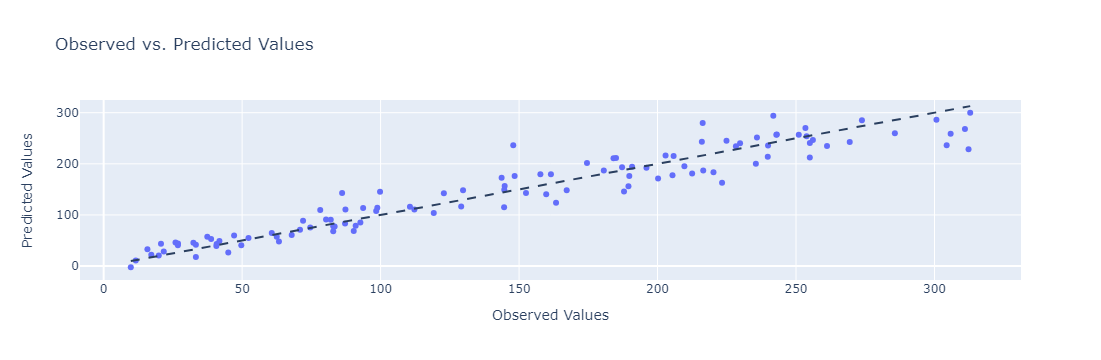

In [45]:
# Scatter plot of observed vs predicted values
fig = px.scatter(x=y_test, y=y_pred, labels={'x': 'Observed Values', 'y': 'Predicted Values'}, title='Observed vs. Predicted Values')
fig.add_shape(type='line', line=dict(dash='dash'), x0=y_test.min(), y0=y_test.min(), x1=y_test.max(), y1=y_test.max())
fig.show()



<a id = 62></a>
#### b) Wenden Sie Ihr Modell nun geeignet an, um den in Deutschland produzierten Solarstrom für die einzelnen Tage vom 29.01.2024-04.02.2024 zu prognostizieren. Bereiten Sie für Ihre Präsentation eine Auswertung vor, wie gut die Prognose im Nachgang war.

In [46]:
def get_average_for_date_range(df, start_date, end_date):
    # Extract month and day from the 'Tag' column
    df['month_day'] = df['Tag'].dt.strftime('%m-%d')

    # Filter for the specified date range
    date_range_df = df[(df['month_day'] >= start_date) & (df['month_day'] <= end_date)]

    # Calculate averages
    averages = date_range_df.groupby('month_day').agg({
        'daylight_duration': 'mean',
        'sunshine_duration': 'mean',
        'shortwave_radiation_sum': 'mean'
    }).reset_index()

    # Drop the 'month_day' column if not needed
    averages = averages.drop('month_day', axis=1)

    return averages

# Example usage for a date range
start_date = '01-29'
end_date = '02-04'
averages_range = get_average_for_date_range(df_combined, start_date, end_date)
averages_range['Kumulative Tages-Bruttoleistung'] = 82000000
averages_range

daylight_duration  sunshine_duration  shortwave_radiation_sum  \
0       33250.339844       10577.609375                 3.160000   
1       33429.886719       12097.898438                 3.760000   
2       33611.917969       10600.000000                 3.690000   
3       33796.218750        5442.587402                 3.211667   
4       33982.542969        7835.893066                 3.010000   
5       34170.730469        7312.179688                 2.648333   
6       34360.894531       20132.552734                 5.198333   

   Kumulative Tages-Bruttoleistung  
0                         82000000  
1                         82000000  
2                         82000000  
3                         82000000  
4                         82000000  
5                         82000000  
6                         82000000

In [47]:
# Use the trained model to make predictions on a new dataset ('averages_range')
solar_test = model.predict(averages_range[['Kumulative Tages-Bruttoleistung', 'daylight_duration', 'sunshine_duration', 'shortwave_radiation_sum']])

print(solar_test)


[67.39722835 72.69460671 72.16953202 67.6574344  67.08008454 64.58387316
 87.47170144]


<a id = 63></a>
#### c) Gehen Sie abschließend auf mögliche Limitierungen des Modells ein und erläutern Sie, durch welche Maßnahmen es verbessert werden könnte.

#### _Das vorliegende lineare Regressionsmodell weist einige mögliche Limitierungen auf. Erstens basiert es auf der Annahme linearer Zusammenhänge zwischen den Features und der Zielvariable, was in komplexeren Szenarien möglicherweise unzureichend ist. Zweitens könnte das Modell anfällig für Ausreißer sein, die die Schätzungen der Koeffizienten beeinflussen. Darüber hinaus sind nur begrenzte Features im Modell enthalten, was die Erfassung komplexerer Zusammenhänge einschränken könnte. Um diese Limitierungen zu überwinden, könnten nichtlineare Modelle in Betracht gezogen, Ausreißer behandelt, zusätzliche relevante Features eingeführt und eine umfassendere Datenerfassung durchgeführt werden. Dies würde zu einer robusten und präziseren Modellierung führen._

<a id = 70></a>
# Zusammenfassung

Die durchgeführte Analyse offenbarte die folgenden Zusammenhänge:

**1) Ausbau der erneuerbaren Energien:**
   - Erheblicher Zuwachs bei erneuerbaren Energien.
   - Alle Formen erneuerbarer Energien, insbesondere Solar- und Windenergie, verzeichnen einen Anstieg.
   - Der Trend zur Kohleverstromung zeigt rückläufige Tendenzen.
   - Ein vollständiger Ausstieg aus der Kernenergie ist für Mitte 2023 geplant.
   - Die Anzahl der Solarpaneele wächst kontinuierlich und hat besonders in den letzten zehn Jahren eine rapide Zunahme erfahren.

**2) Zeitpunkt der höchsten Energieerzeugung:**
   - Ein erhöhter Energiebedarf an Werktagen.
   - Ein höherer Energiebedarf während der Wintermonate.

**3) Zusammenhang zwischen Sonnenenergie und Wetterbedingungen:**
   - Wetterelemente wie Sonneneinstrahlung, Tagestemperatur und Sonnenscheindauer beeinflussen unmittelbar die Menge der erzeugten Sonnenenergie.
   - Diese Beziehung wurde für unsere lineare Regression herangezogen.

Die gewonnenen Erkenntnisse zeigen eine positive Entwicklung in Richtung nachhaltigerer Energiequellen und verdeutlichen die klare Wechselwirkung zwischen Energieerzeugung, Wetterbedingungen und technologischem Fortschritt.
